# Table des matières

### [Importations](#T1)
- [Importing packages](#T1C1)
- [Importing food data](#T1C2)


### [Overview of the data and cleaning up](#T2)
- [Description du jeu de données](#T2C1)
- [Idée d'application nutritionnelle](#T2C2)
- [Correction du type des variables](#T2C3)
- [Observation des valeurs manquantes](#T2C4)
- [Elimination des features à 100 % de valeurs manquantes](#T2C5)
- [Elimination de lignes avec des features importantes  manquantes](#T2C6)
- [Valeurs dupliquées et leur élimination](#T2C7)
- [Correction variables pays](#T2C8)
- [Distribution des produits par pays](#T2C9)

### [Valeurs aberrantes et manquantes](#T3)
- [Observation des valeurs nutritives](#T3C1)
- [Valeurs négatives](#T3C2)
- [Valeurs à la mauvaise unité](#T3C3)
- [Correction de la feature Fat_100g](#T3C4)
- [Correction de la feature saturated-fat_100g](#T3C5)
- [Correction des la feature carbohydrates](#T3C6)
- [Correction des features Salt/Sodium](#T3C7)
- [Valeurs extrêmes : somme des macro-éléments](#T3C8)
- [Correction et remplissage d'energy-from-fat_100g](#T3C9)
- [Correction et remplissage d'energy_100g](#T3C10)
- [Différence entre energy_100g mesurée et entrée](#T3C11)

***
# <a name="T1">Importations</a>

### <a name = "T1C1">a. Importing packages </a>

In [12]:
import subprocess

# Latest upgrade
libraries_to_update = [
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "scipy",
    #"scikit-learn",
]

for library in libraries_to_update:
    subprocess.check_call(["pip", "install", "--upgrade", library])

On importe l'ensemble des librairies utilisées lors du projet

In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as st
from scipy import stats
#import statsmodels.api as sm
import copy
from IPython.display import clear_output

In [13]:
libraries = {
    "Pandas" : pd,
    "Numpy" : np,
    "Seaborn" : sns,
    "matplotlib" : matplotlib,
    "scipy" : scipy
}

#Showing packages versions
for lib_name, lib in libraries.items():
    print(f"{lib_name} Version : {lib.__version__}")

Pandas Version : 2.1.2
Numpy Version : 1.26.1
Seaborn Version : 0.13.0
matplotlib Version : 3.8.1
scipy Version : 1.11.3


### <a name = "T1C2">b. Importating food data </a>

In [14]:
# For testings, only 200 k lines will be read
DEBUG = 200000

In [15]:
# Data are separated by a tab.
# We limit the number of rows for testing, as the file is quite big for the computer setup

data = pd.read_csv("en.openfoodfacts.org.products.csv", sep = "\t", nrows = DEBUG)

C:\Users\33664\AppData\Local\Temp\ipykernel_13240\2857205054.py:2: DtypeWarning: Columns (0,9,15,29,30,31,33,70) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("en.openfoodfacts.org.products.csv", sep = "\t", nrows = DEBUG)


***
# <a name="T2">Overview of the data and cleaning up </a>

### <a name = "T2C1">a. Description du jeu de données </a>

On regarde à quoi ressemble le jeu de données.

In [3]:
print("Dans ce jeu de données, on retrouve :")
print("Nombre de lignes : ", data.shape[0], "\nNombre de colonnes : ", data.shape[1])

Dans ce jeu de données, on retrouve :
Nombre de lignes :  320772 
Nombre de colonnes :  162


In [4]:
with pd.option_context('display.max_columns', None):
    display(data.head())
    
    # On va regarder les caractéristiques générales des features
    display(data.describe())

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,229554.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,24.000000,23.000000,0.0,0.0,1.0,0.0,22823.000000,22859.000000,841.000000,186.000000,38.000000,78.000000,188.000000,149.000000,8.000000,24.000000,23.000000,21.000000,13.000000,0.0,1.400000e+01,0.0,0.0,0.0,143298.000000,144090.000000,243588.000000,244971.000000,72.000000,26.000000,38.000000,262.000000,4.000000,11.000000,266.000000,414.000000,200886.000000,259922.000000,27.000000,16.000000,9.000000,255510.000000,255463.000000,4133.000000,137554.000000,34.000000,7057.000000,1340.000000,918.000000,140867.000000,11154.000000,10815.000000,11729.000000,6784.000000,5240.000000,3042.000000,5.300000e+03,330.000000,2483.000000,38.000000,81.000000,24748.000000,158.000000,141050.000000,5845.000000,140462.000000,6253.000000,3929.000000,2106.000000,1620.000000,79.000000,1168.000000,20.000000,11.000000,259.000000,78.000000,29.000000,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,5.129932,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.752667,10.673913,NaN,NaN,61.0,NaN,10.425055,6.312493,3.182103,2.250285,3.186553,1.635462,16.229144,3.823819,0.057000,0.153842,0.061567,40.192857,25.123077,NaN,1.357143e-06,NaN,NaN,NaN,0.073476,0.020071,32.073981,16.003484,11.841667,2.878846,25.897368,6.354084,24.325000,12.163636,31.925000,49.790389,2.862111,7.075940,4.658148,2.506250,0.021678,2.028624,0.798815,7.838105,0.000397,0.518715,0.000008,0.056705,0.034219,0.023367,0.325574,0.259007,0.020303,0.023378,0.006898,0.205856,8.938696e-05,0.121290,0.072138,0.013123,0.119052,0.424635,0.092638,0.125163,0.617282,0.003652,0.534143,0.007950,0.025794,0.003014,0.012161,0.003126,0.001690,0.000401,0.000427,1.594563,0.145762,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,8.014238,NaN,NaN,NaN,0.226274,24.101433,NaN,NaN,NaN,4.019993,3.379647,NaN,NaN,NaN,NaN,17.0761

On a deux types de features : 
- **Qualitatives** : Elles donnent des informations sur additionnelles sur les produits.
    
- **Quantitatives** (caractérisées par _100g et représentent pour la majorité les quantités retrouvées dans les aliments) :
     Il y a des valeurs aberrantes sur les quantités des nutriments, avec des valeurs négatives ou alors des valeurs > 100 g. Ces données devront être corrigées.

- On observe déjà des colonnes vides (devront être supprimées)


### <a name = "T2C2">b. Idée d'application nutritionnelle </a>

D'après les données disponibles, une idée d'application qu'on pourrait développer :

**Recommander des produits plus sains selon une liste de course**

Par exemple : on a dans la liste "ketchup"

On voudrait qu'à partir de la base de données, on ait une recommandation de ketchup sain, basé sur le nutrition score (plus le nutrition score est faible, plus le produit est supposé être sain), mais également disponible dans le pays.

Il faudrait donc : 
- Avoir les informations du nutrition score
- Avoir les informations du pays
- Catégoriser les produits (un ketchup étant une marque, il faudrait identifier des produits similaires)

En plus de cela, on voudrait pouvoir identifier des produits riches en fibres, pauvres en sucres etc

Mettre en avant les produits issus de l'agriculture biologique.

### <a name = "T2C3">c. Correction du type des variables</a>

In [5]:
# On regarde le type des colonnes
with pd.option_context('display.max_rows', None):
    display(data.dtypes)

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

### Observations : 

- Il y a des colonnes qui ne sont pas du bon type (float64 au lieu d'object). On va corriger ça.


In [6]:
liste_feat = ["no_nutriments","nutrition_grade_uk","ingredients_that_may_be_from_palm_oil","ingredients_from_palm_oil","no_nutriments"]

display(data[liste_feat].dtypes)
data = data.astype({"no_nutriments":"object","nutrition_grade_uk":"object","ingredients_that_may_be_from_palm_oil":"object","ingredients_from_palm_oil":"object","no_nutriments":"object"})
display(data[liste_feat].dtypes)

no_nutriments                            float64
nutrition_grade_uk                       float64
ingredients_that_may_be_from_palm_oil    float64
ingredients_from_palm_oil                float64
no_nutriments                            float64
dtype: object

no_nutriments                            object
nutrition_grade_uk                       object
ingredients_that_may_be_from_palm_oil    object
ingredients_from_palm_oil                object
no_nutriments                            object
dtype: object

### <a name = "T2C4">d. Observation des valeurs manquantes</a>

On va maintenant regarder le nombre de valeurs manquantes par features

In [7]:
donnees_manquantes_totale = data.isnull().sum().sum()
nombre_total = data.shape[0]*data.shape[1]
print("Il y a", (donnees_manquantes_totale /nombre_total*100).round(), "% de valeurs manquantes dans ce jeu de données")


Il y a 76.0 % de valeurs manquantes dans ce jeu de données


In [8]:
## Fonction permettant d'afficher le pourcentage de valeurs manquante par colonnes sous la forme d'un barplot

def valeurs_manquantes_graph(df, element):
    
    #element : "row" ou "column"
    #Si element = row, on analyse le degré de complétude par ligne
    #Si element = column, on analyse le pourcentage de données manquantes par colonnes
    
    
    if element == "column":
        # On créé une liste qui va accueillir le % de données manquantes par feature
        # On parcours les colonnes du dataframe et on calcule le pourcentage de valeurs manquantes
        donnees_manquantes = [[col, df[col].isnull().sum() / df.shape[0] * 100] for col in df.columns]

        #On transforme notre liste contenant les données manquantes en dataframe
        donnees_manquantes = pd.DataFrame(donnees_manquantes, columns = ['Features', 'Pourcentage manquant'])

        #on trie ensuite les données par le pourcentage de données manquantes
        donnees_manquantes.sort_values("Pourcentage manquant", ascending = False, inplace = True)
    
        hauteur = df.columns.shape[0] / 4
    
        plt.figure(figsize=(12,hauteur))
        
        sns.barplot(data = donnees_manquantes, y = "Features", x = "Pourcentage manquant", color = "red", orient = "h")    

        plt.title("Pourcentage de données manquantes par features, N = " + str(df.shape[0]), fontsize = 20)
        plt.xlabel("Pourcentage de données manquantes (%)", fontsize=18)
        plt.ylabel("Features", fontsize=18)
        plt.xlim(0,100)
        plt.show()
    
    elif element == "row":
        # On compte pour chaque ligne le nombre de features pour lesquelles une valeur est entrée

        #Comptage du nombre de valeurs non NaN
        valeur_nonNaN = df.count(axis = 1)
        
        #Comptage du nombre de valeurs NaN
        valeur_NaN = valeur_nonNaN[valeur_nonNaN == 0]

        #Ensuite on calcul la proportion de complétude
        completude_donnees = valeur_nonNaN / len(df.columns) * 100
        
        print("Il y a %d lignes où nous ne retrouvons aucune valeur entrée" %valeur_NaN.shape[0])

        # On regarde la dispersion des données
        print("Statistiques sur la complétude des données :")
        display(completude_donnees.describe())

        # On affiche les résultats dans une figure

        plt.figure(figsize=(12,8))
        
        sns.histplot(data = completude_donnees, bins = len(df.columns))    
        
        plt.title("Distribution du nombre de lignes \npar features remplies, N_features = " + str(len(df.columns)), fontsize = 20)
        plt.xlabel("Nombre de features remplies (%)", fontsize=18)
        plt.ylabel("Nombre de lignes, n = " + str(df.shape[0]), fontsize=18)
        plt.show()
        
    else :
        print("N'a pu rien afficher")
        print("La fonction prend en arguement /element/ qui ne prend comme valeurs /row/ ou /column/")


On va ensuite afficher le pourcentage de valeurs manquantes par feature.

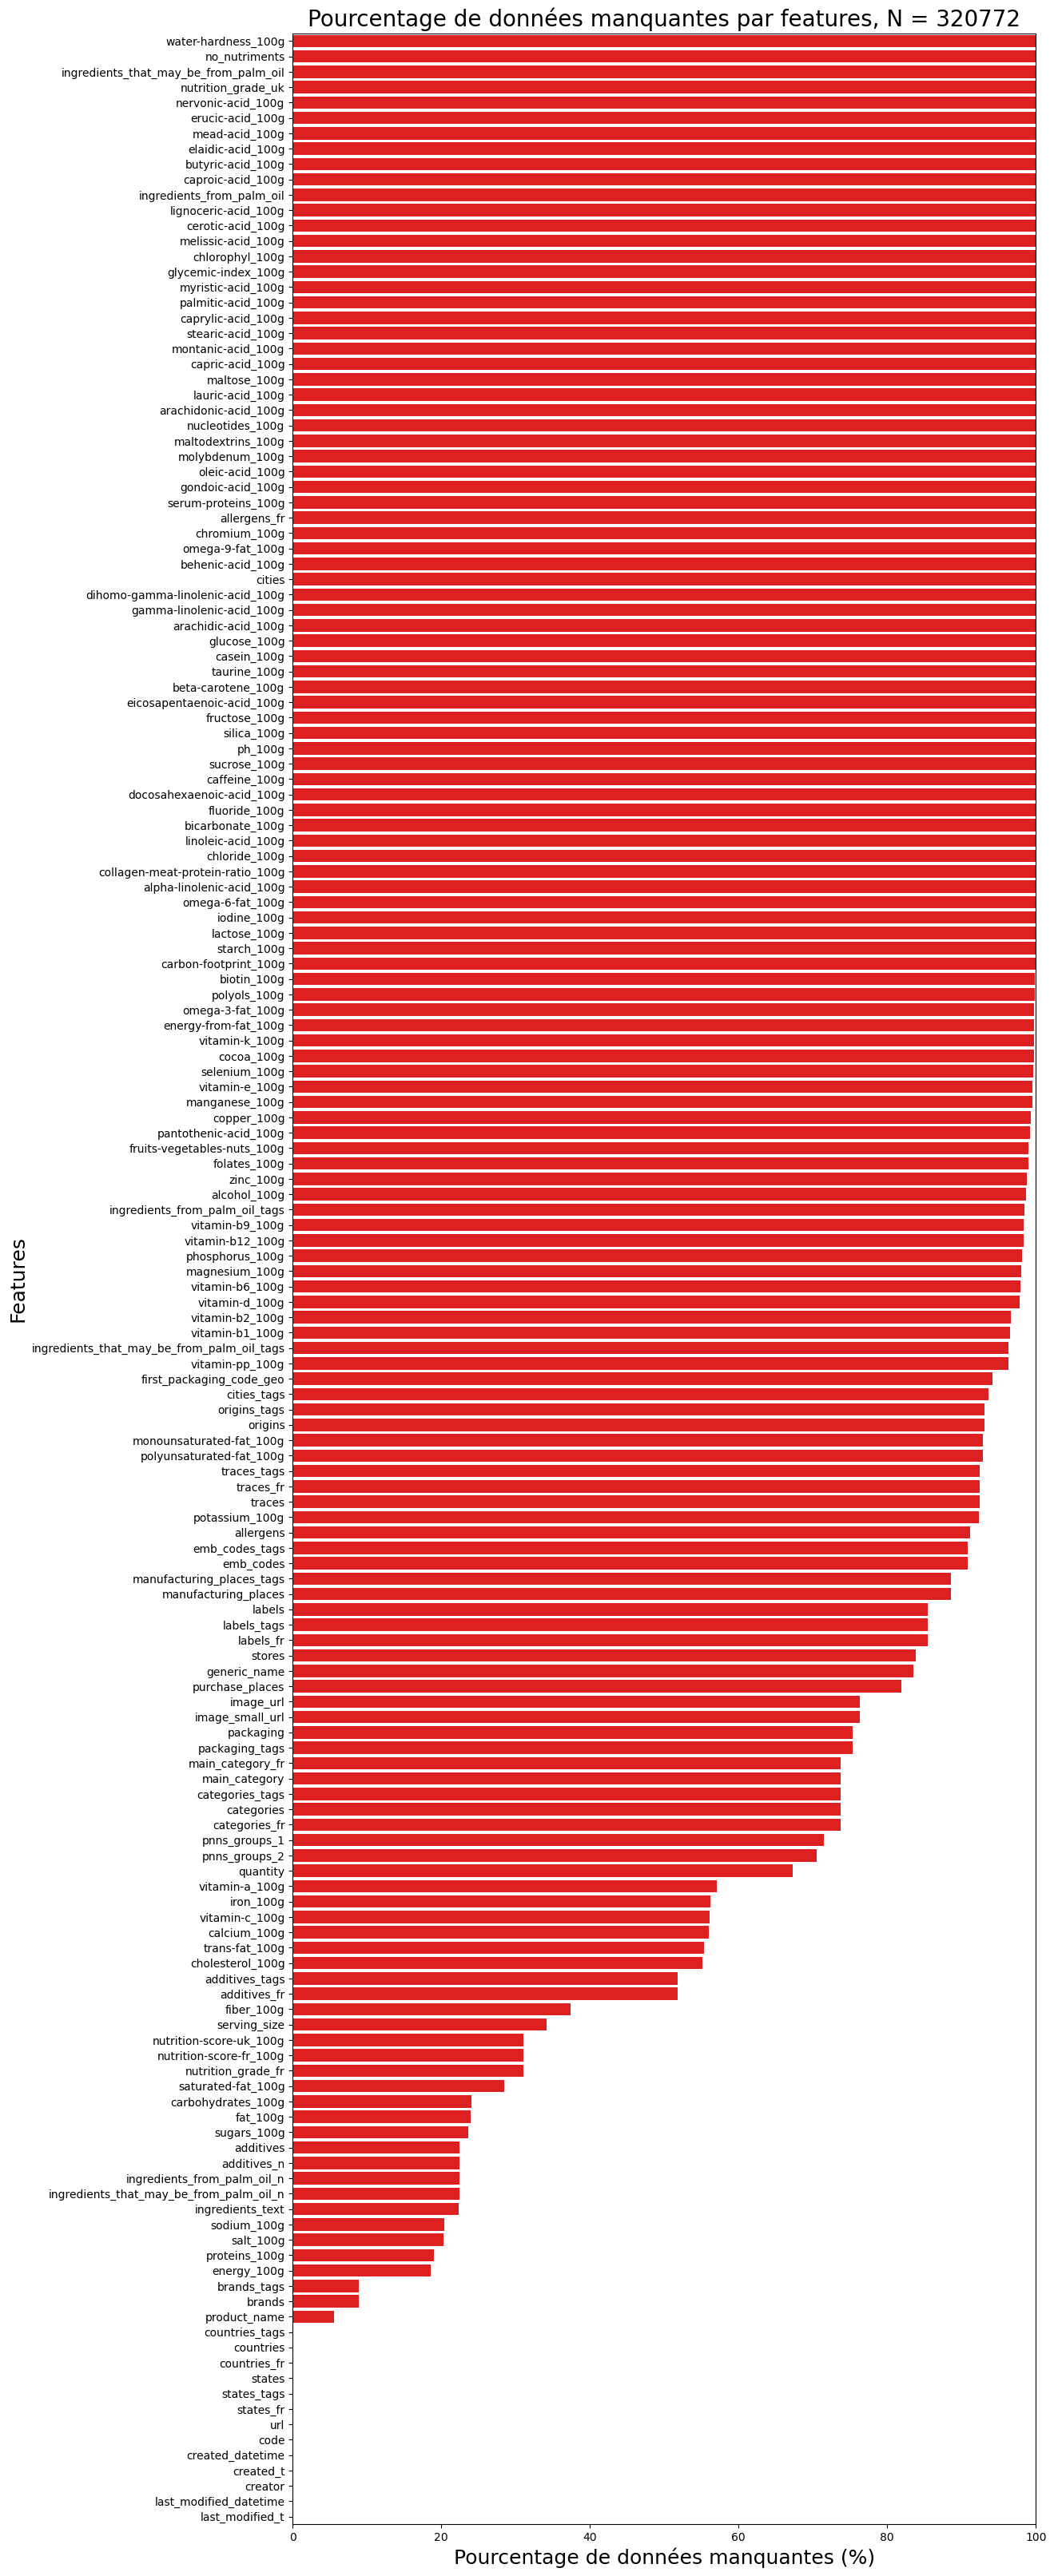

In [9]:
valeurs_manquantes_graph(data,'column')

### Observations :

La majorité des features n'a pas ou peu de valeurs (99-100 %), comme le montre le barplot. 

On peut déjà supprimer les features avec 100 % de valeurs manquantes.

On va garder les autres pour l'instant, qui pourraient nous servir à trouver les valeurs aberrantes.

### <a name = "T2C5">e. Elimination des features à 100 % de valeurs manquantes</a>


In [10]:
## Donne accès aux opérateurs
import operator

## Fonction permettant d'éliminer les features selon le(s) critère(s) donné(s)
def eliminationFeature(df, critere_number, critere_ope, feature = 0):
    # Prend en arguments:
        ## df : dataframe à modifier
        ## critere_number : pourcentage sur lequel l'élimination sera réalisée (peut envoyer une liste)
        ## critere_ope : opérator en "" utilisé (peut envoyer une liste)

    # Dictionnaire permettant de convertir critere_ope str en operator
    rel_ops = {
        '>': operator.gt,
        '<': operator.lt,
        '>=': operator.ge,
        '<=': operator.le,
        '==': operator.eq,
        '!=': operator.ne
    }
    
    if feature == 0:
        feature = df.columns
    
    # On calcule le pourcentage de valeurs manquantes par features
    donnees_manquantes = [[col, df[col].isnull().sum() / df.shape[0] * 100] for col in feature]

    #On transforme notre liste contenant les données manquantes en dataframe
    donnees_manquantes = pd.DataFrame(donnees_manquantes, columns = ['Features', 'Pourcentage manquant'])
    
    ## on récupère la liste de feature à éliminer selon le critère
    liste_elimination = donnees_manquantes.loc[rel_ops[critere_ope](donnees_manquantes["Pourcentage manquant"], critere_number) , "Features"]
    
    print("On passe de %d" %df.shape[1], end = " ")
    [df.pop(col) for col in liste_elimination]
    print("à %d features" %df.shape[1])
    print("Avec cette liste de features éliminées :")
    
    with pd.option_context('display.max_rows', None):
        display(liste_elimination)
    
    return df

In [11]:
# On appel notre fonction afin d'éliminer les features avec 100 % de valeurs manquantes
data = eliminationFeature(data, 100, "==")

On passe de 162 à 146 features
Avec cette liste de features éliminées :


41                             no_nutriments
47                 ingredients_from_palm_oil
50     ingredients_that_may_be_from_palm_oil
52                        nutrition_grade_uk
67                         butyric-acid_100g
68                         caproic-acid_100g
77                      lignoceric-acid_100g
78                         cerotic-acid_100g
80                        melissic-acid_100g
94                         elaidic-acid_100g
96                            mead-acid_100g
97                          erucic-acid_100g
98                        nervonic-acid_100g
156                          chlorophyl_100g
160                      glycemic-index_100g
161                      water-hardness_100g
Name: Features, dtype: object

### <a name = "T2C6">f. Elimination de lignes avec des features importantes  manquantes</a>

Le **nom du produit** est essentiel pour le développement de notre application et en absence de son nom, il serait plus difficile de retrouver le produit. C'est pareil pour le **code**.

On va donc éliminer ces produits.


In [12]:
print("Il y a %d lignes où le nom du produit n'est pas renseigné" %data["product_name"].isnull().sum())

ligne_elimination_index = data.loc[data["product_name"].isnull()].index 

print("On passe de %d" %data.shape[0], end = " ")
data = data.loc[~data.index.isin(ligne_elimination_index)]
print("à %d lignes" %data.shape[0])

Il y a 17762 lignes où le nom du produit n'est pas renseigné
On passe de 320772 à 303010 lignes


In [13]:
print("Il y a %d lignes où le code du produit n'est pas renseigné" %data["code"].isnull().sum())

ligne_elimination_index = data.loc[data["code"].isnull()].index 

print("On passe de %d" %data.shape[0], end = " ")
data = data.loc[~data.index.isin(ligne_elimination_index)]
print("à %d lignes" %data.shape[0])

Il y a 23 lignes où le code du produit n'est pas renseigné
On passe de 303010 à 302987 lignes


Egalement, une **absence totale d'information nutritionnelle** sur les produits est préjudiciable. 

Ces produits seront éliminés si 100 % d'information est manquante. 

Il y a 41020 lignes où nous ne retrouvons aucune valeur entrée
Statistiques sur la complétude des données :


count    302987.000000
mean         13.732883
std           7.503208
min           0.000000
25%          10.344828
50%          13.793103
75%          19.540230
max          51.724138
dtype: float64

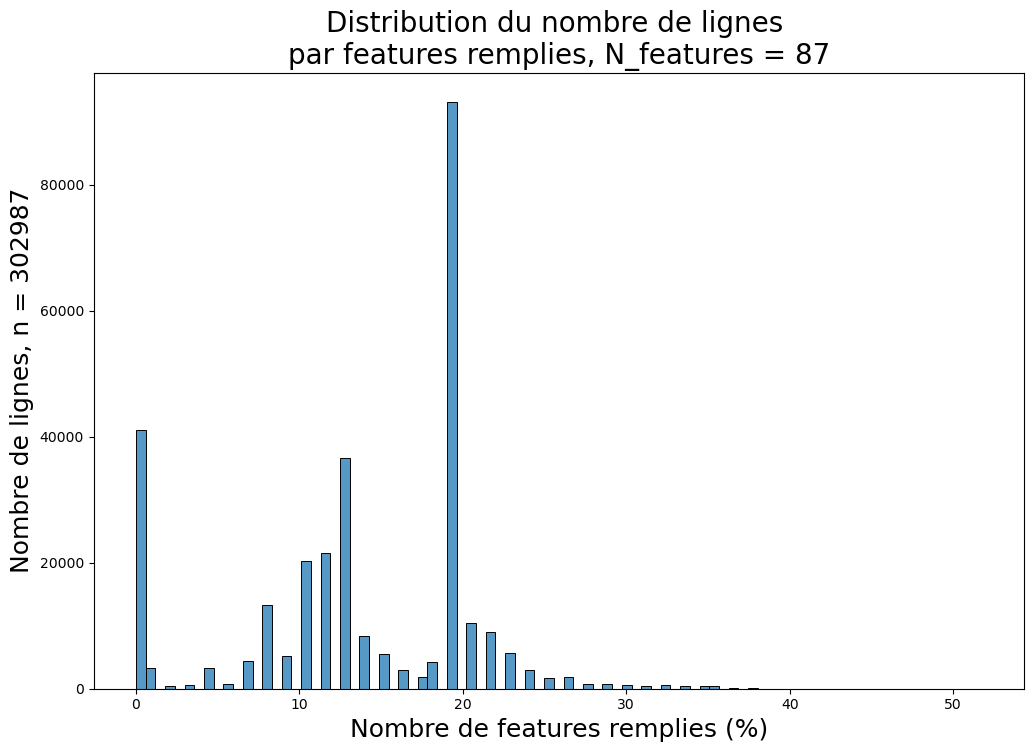

In [14]:
# On récupère les features ayant comme informations les valeurs nutritives (+nutriscore)
poids_cols = [col for col in data.columns if "100g" in col]

valeurs_manquantes_graph(data[poids_cols],"row")


In [15]:
## Donne accès aux opérateurs
import operator

## Fonction permettant d'éliminer les lignes selon le(s) critère(s) donné(s)
def eliminationRows(df, critere_number, critere_ope, feature = 0):
    # Prend en arguments:
        ## df : dataframe à modifier
        ## feature : df.columns si aucune sous_liste spécifiée
        ## critere_number : pourcentage sur lequel l'élimination sera réalisée (peut envoyer une liste)
        ## 0 = 0 données, 100 = 100% des données remplies
        ## critere_ope : opérator en "" utilisé (peut envoyer une liste)

    # Dictionnaire permettant de convertir critere_ope str en operator
    rel_ops = {
        '>': operator.gt,
        '<': operator.lt,
        '>=': operator.ge,
        '<=': operator.le,
        '==': operator.eq,
        '!=': operator.ne
    }
    
    if feature == 0:
        feature = df.columns
    
    # Comptage du nombre de valeurs entrées par ligne
    valeur_nonNaN = df[feature].count(axis = 1)
    
    # Calcul de la proportion de complétude
    completude_donnees = valeur_nonNaN / len(feature) * 100
    
    # On récupère une liste d'indexes des lignes à éliminer selon le critère
    liste_index_elimination = completude_donnees[rel_ops[critere_ope](completude_donnees, critere_number)].index
    
    print("On passe de %d" %df.shape[0], end = " ")
    # On élimine les lignes qui sont présentes dans la liste récupérée
    df = df.loc[~df.index.isin(liste_index_elimination)]
    print("à %d lignes" %df.shape[0], end = " ")
    print("(- %d)" %liste_index_elimination.shape[0])
    
    return df

In [16]:
# On appel notre fonction permettant d'éliminer les lignes ayant 0 features remplies

data = eliminationRows(data, 0, "==", poids_cols)


On passe de 302987 à 261967 lignes (- 41020)


Il y avait donc 41020 lignes sans informations nutritionnelles (>10% de la base de données).

### <a name = "T2C7">g. Valeurs dupliquées et leur élimination</a>

On analyse s'il y a présence de valeurs dupliquées.

In [17]:
# Pour voir les duplicats il faut se baser sur le nom du produit. 
# Certains produits peuvent être vendus avec différentes quantités, on ne veut en garder qu'une référence du produit
# Certains produits peuvent être vendus dans différents pays, on veut garder cette information pour l'instant

#Criteres : on analyse les duplicats sur une liste de ces critères
criteres = ["product_name", "countries_tags"] + poids_cols

with pd.option_context('display.max_columns', None):
    display(data.loc[data[criteres].duplicated(keep = False),:].sort_values("product_name", ascending = False))

# On élimine les duplicats
print("On passe de %d" %data.shape[0], end = " ")
data.drop_duplicates(subset = criteres, keep = "first", inplace = True)
print("à %d lignes" %data.shape[0])


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
316952,8850999000565,http://world-fr.openfoodfacts.org/produit/8850...,tacinte,1456721000,2016-02-29T04:43:20Z,1470662718,2016-08-08T13:25:18Z,เบียร์สิงห์,NaN,500 mL,"ขวดแก้ว, ขวด","ขวดแก้ว,ขวด","Singha,สิงห์","singha,สิงห์","Beverages,Alcoholic beverages,Beers,เบียร์","en:beverages,en:alcoholic-beverages,en:beers,t...","Boissons,Boissons alcoolisées,Bières,th:เบียร์",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"กรุงเทพมหานคร,ประเทศไทย",NaN,ประเทศไทย,en:thailand,Thaïlande,เบียร์,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[ เบียร์ -> th:เบียร์ ],NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,Alcoholic beverages,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:beverages,Boissons,http://fr.openfoodfacts.org/images/products/88...,http://fr.openfoodfacts.org/images/products/88...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316955,8850999113005,http://world-fr.openfoodfacts.org/produit/8850...,bcatelin,1444205553,2015-10-07T08:12:33Z,1469998734,2016-07-31T20:58:54Z,เบียร์สิงห์,NaN,330 mL,"กระป๋อง,Can","กระป๋อง,can","Singha,สิงห์","singha,สิงห์","เบียร์,en:Lagers","en:beverages,en:alcoholic-beverages,en:beers,e...","Boissons,Boissons alcoolisées,Bières,Bières bl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ประเทศไทย,en:thailand,Thaïlande,เบียร์,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[ เบียร์ -> th:เ

On passe de 261967 à 246675 lignes


In [18]:
# Les produits ne doivent pas avoir le même code, sauf duplicat

with pd.option_context('display.max_columns', None):
    display(data.loc[data["code"].duplicated(keep = False),:].sort_values("code", ascending = False))

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
116492,5400141350470,http://world-fr.openfoodfacts.org/produit/0540...,emerzh,1484997881,2017-01-21T11:24:41Z,1484998804,2017-01-21T11:40:04Z,Cereal flakes,NaN,500 g,NaN,NaN,boni,boni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belgique,en:belgium,Belgique,"Céréales (63 % riz, 21 % BLE complet), sucre, ...",NaN,NaN,NaN,NaN,NaN,30g,1.0,[ cereales -> en:cereales ] [ 63-riz -> en:...,en:e471,E471 - Mono- et diglycérides d'acides gras ali...,0.0,NaN,1.0,e471-mono-et-diglycerides-d-acides-gras-alimen...,b,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1634.0,NaN,1.50,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.00,17.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1,9.40,NaN,NaN,NaN,0.88000,0.346457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
276819,5400141350470,http://world-fr.openfoodfacts.org/produit/5400...,gauthier-de-geest,1481365048,2016-12-10T10:17:28Z,1485724198,2017-01-29T21:09:58Z,Cribbits Rice & Wheat Flakes,NaN,NaN,NaN,NaN,Boni,boni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1611.0,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Observation : 

Des produits aux noms différents ont le même code.

Etant donné qu'ils y en a peu, on les élimine de la base de données.

In [19]:
print("On passe de %d" %data.shape[0], end = " ")
data.drop_duplicates(subset = "code", keep= False, inplace = True)
print("à %d lignes" %data.shape[0])

On passe de 246675 à 246539 lignes


### <a name = "T2C8">h. Correction variables pays</a>

Nous avons pu voir que les features pays étaient remplies à 100  %.  

On va maintenant vérifier leur contenu, car important pour l'application a développer.

In [20]:
display(data[["countries", "countries_tags", "countries_fr"]])

,countries,countries_tags,countries_fr
1,US,en:united-states,États-Unis
2,US,en:united-states,États-Unis
3,US,en:united-states,États-Unis
4,US,en:united-states,États-Unis
5,US,en:united-states,États-Unis
...,...,...,...
320757,France,en:france,France
320761,France,en:france,France
320763,France,en:france,France
320768,US,en:united-states,États-Unis


In [21]:
donnees_manquantes =[] 

for col in ["countries", "countries_tags", "countries_fr"]:
    donnees_manquantes.append([col,data[col].isnull().sum()])

display(donnees_manquantes)

[['countries', 73], ['countries_tags', 73], ['countries_fr', 73]]

Il y a quand même quelques valeurs manquantes.

Ca ne concerne que peu de pays, on va les éliminer.

In [22]:
ligne_elimination_index = data[data.countries.isnull()].index

print("On passe de %d" %data.shape[0], end = " ")
data = data.loc[~data.index.isin(ligne_elimination_index)]
print("à %d lignes" %data.shape[0])

On passe de 246539 à 246466 lignes


Pour plus de faciliter, et car l'information est redondante, nous allons nous focaliser que sur "countries_fr"

In [23]:
print(data.countries_fr.unique())

['États-Unis' 'Royaume-Uni' 'France,États-Unis' 'Canada' 'France'
 'Allemagne' 'Roumanie' 'Espagne' 'France,Royaume-Uni' 'Canada,États-Unis'
 'France,États-Unis,en:Etats-unis' 'Royaume-Uni,États-Unis'
 'Belgique,France' 'Belgique,France,Pays-Bas,Royaume-Uni'
 'États-Unis,en:Australie' 'Arabie saoudite' 'Australie,États-Unis'
 'Australie' 'France,Suisse'
 'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis'
 'États-Unis,en:Pays-bas' 'Espagne,Royaume-Uni,en:Scotland' 'Mexique'
 'Suisse,États-Unis' 'États-Unis,en:Deutschland' 'Suisse'
 'France,Suisse,États-Unis' 'Belgique,Suisse,États-Unis'
 'Danemark,États-Unis,en:Spanien' 'États-Unis,en:Belgie,en:Nederland'
 'Belgique,Suisse' 'France,Allemagne' 'Malaisie,États-Unis' 'Serbie'
 'Hong Kong' 'Bahreïn,États-Unis' 'France,Italie' 'Cuba'
 'France,Royaume-Uni,États-Unis' 'Italie,États-Unis' 'Suisse,Royaume-Uni'
 'Belgique' 'Espagne,États-Unis' 'Panama,États-Unis' 'Émirats arabes unis'
 'Israël,États-Unis' 'Chine,Suisse' 'Saint-Pierre-et-

Une première analyse montre :  
- Plusieurs pays peuvent être présentés
- Il y a des erreurs sur le nom de certains pays
- Des pays ne sont pas inscrits en français
- Il y a des départements.
- Sur certains, il y a le code "xx:"

Dans un premier temps, on créé un dictionnaire comprenant les changements à effectuer

In [24]:
## Pas mal de corrections à faire
Pays_a_corriger= {"Canada" : ["Québec", "Quebec", "Saint John", "Moosehead Breweries Ltd", "New Brunswick", "J3L 2H6", "La Brasserie Unibroue"], 
                  "Allemagne" : ["Deutschland", "Germany", "Duitsland", "Allemange", "Nemetorszag"], 
                  "Japon" : ["日本", "Other-日本", "Other-Japon"],
                  "Union européenne": ["Union Européenne"],
                  "Hong Kong" : ["香港"],
                  "Hongrie" : ["Magyarorszag"],
                  "Pays-Bas" : ["Niederlande", "Nederland", "Pays-bas"],
                  "Etats-Unis" : ["Îles Vierges des États-Unis", "Etats-unis","États-unis", "États-Unis", "USA", "United States of America", "California"] ,
                  "France" : ["Nouvelle-Calédonie","Cora","Puyricard", "Franciaorszag", "Saint-Pierre-et-Miquelon", "Polynésie française", "Frankrijk", 'Bourgogne-aube-nogent-sur-seine', "Frankrike","Martinique", 'Frankreich', "Guadeloupe","Paca", "Guyane", "Chambly", "La Réunion", "Marseille-6", "77-provins", "Aix-en-provence","Bouches-du-rhone",  "Bourgogne" ],
                  "Espagne" : ["Spanyolorszag", "Spanje", "Spain", "Spanien"],
                  "Trinité-et-Tobago": ["W.I.", "Carib Brewery Ltd","Champs Fleurs","Trinidad"],
                  "Suisse" : ["Zwitserland", "Schweiz", "Svajc"],
                  "Belgique": ["Belgien", "Belgie"],
                  "Portugal" : ["Portugalia"],
                  "Italie" : ["Italien", "Italy", "Torino", "Italiaans", "Italia", "italie"],
                  "Turquie": ["Other-turquie", "Turkiye"],
                  "Norvège" : ["Noorwegen"],
                  "Suède"  : ["Zweden", "Sverige"],
                  "Émirats arabes unis" : ["الإمارات-العربية-المتحدة"],
                  "République de Chine"  : ["Republique-de-chine","Republik-china", "Chine", "Kina", "République de République de Chine"],
                  "Australie" : ["Australien", "ประเทศออสเตรเลีย", "Australia"],
                  "Finlande" : ["Finand", "Finland", "Finlandee"],
                  "Brésil" : ["São Paulo Brasil"],
                  "Danemark": ["Denemarken"],
                  "Islande" :  ["Island", "Islandeee", "Islandee"],
                  "Kazakhstan" : ["Казахстан"],
                  "Azerbaïdjan" : ["Azərbaycan"],
                  "Argentine" : ["Argentina"],
                  "Royaume-Uni" : ["England","Alva","Hiifoots Village", "สหราชอาณาจักร", "Angleterre", "Royaume-uni", "Nagy-britannia", "المملكة-المتحدة", "Scotland", "Vereinigtes-konigreich"],
                  "République tchéque": ["Czech", "Tschechien", "République tchèque"],
                  "Inde" : ["भारत"],
                  "Tunisie": ["تونس"],
                  "Oman" : ["سلطنة-عمان"],
                  "Irak" : ["العراق"],
                  "" : ["Inconnu",'dairies', 'fruit-yogurts', 'stirred-yogurts', 'whole-milk-yogurts', 'yogurts'],
                  "Pologne"  : ["Szczecin"], 
                  "Thaïlande" : ["ประเทศไทย"],
                  "Arabie Saoudite" : ["السعودية", "Arabie saoudite"]
                 }


In [25]:
# On recherche les tags, caractérisés par "xx:"" et on les élimine
data["countries_fr"] = data["countries_fr"].str.replace("..:","", regex= True)

#On recherche les mal annotés et on les remplace à l'aide du dictionnaire
for key in Pays_a_corriger:
    for k in Pays_a_corriger[key] :
        data.loc[data["countries_fr"].str.find(k) != -1, "countries_fr"] = data.loc[data["countries_fr"].str.find(k) != -1, "countries_fr"].str.replace(k, key)


C:\Users\33664\AppData\Local\Temp\ipykernel_18840\3880774613.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data.loc[data["countries_fr"].str.find(k) != -1, "countries_fr"] = data.loc[data["countries_fr"].str.find(k) != -1, "countries_fr"].str.replace(k, key)


In [26]:
data["countries_fr"].unique()


array(['Etats-Unis', 'Royaume-Uni', 'France,Etats-Unis', 'Canada',
       'France', 'Allemagne', 'Roumanie', 'Espagne', 'France,Royaume-Uni',
       'Canada,Etats-Unis', 'France,Etats-Unis,Etats-Unis',
       'Royaume-Uni,Etats-Unis', 'Belgique,France',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Etats-Unis,Australie',
       'Arabie Saoudite', 'Australie,Etats-Unis', 'Australie',
       'France,Suisse',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,Etats-Unis',
       'Etats-Unis,Pays-Bas', 'Espagne,Royaume-Uni,Royaume-Uni',
       'Mexique', 'Suisse,Etats-Unis', 'Etats-Unis,Allemagne', 'Suisse',
       'France,Suisse,Etats-Unis', 'Belgique,Suisse,Etats-Unis',
       'Danemark,Etats-Unis,Espagne', 'Etats-Unis,Belgique,Pays-Bas',
       'Belgique,Suisse', 'France,Allemagne', 'Malaisie,Etats-Unis',
       'Serbie', 'Hong Kong', 'Bahreïn,Etats-Unis', 'France,Italie',
       'Cuba', 'France,Royaume-Uni,Etats-Unis', 'Italie,Etats-Unis',
       'Suisse,Royaume-Uni', 'Belgique',

Il ne reste que des pays soient seuls, soient associés à d'autres

In [27]:
data = data.reset_index()
nb_ligne = data.shape[0]

#On récupére l'index de chaque ligne où on retrouve plusieurs pays (sep = ",")
#On va séparer la ligne en plusieurs lignes, pour chaque pays, puis éliminer la ligne
liste_index_pays = data.loc[data["countries_fr"].str.find(",") != -1].index

#liste de serie à ajouter au dataframe
serie = []

#on parcours notre liste d'index à modifier
for idx in liste_index_pays:
    #On parcours notre liste de pays (qu'on sépare avec un split)
    for pays in data.loc[data.index == idx, "countries_fr"].str.split(","):
        #On parcours chaque pays de la liste
        for p in pays:
            #Execution plus rapide qu'une list comprehension
            #On copie la serie entière, puis on remplace la liste de pays par le pays.
            #On fait cela avec toute la liste de pays présent
            mask = copy.deepcopy(data.loc[data.index == idx])
            mask["countries_fr"] = p
            
            # on append notre liste de series
            serie.append(mask)    
            
# A la fin, on ajoute au dataframe les lignes supplémentaires
data = data.append(serie, ignore_index=True)

# On élimine les lignes d'origines
data = data.loc[~data.index.isin(liste_index_pays)]

print("Nous somme passé de ", nb_ligne , "lignes à ", data.shape[0], "lignes.")

display(data.tail()) 
display(data["countries_fr"].tail())


C:\Users\33664\AppData\Local\Temp\ipykernel_18840\665354270.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(serie, ignore_index=True)


Nous somme passé de  246466 lignes à  251786 lignes.


,index,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
255946,320630,9556156046726,http://world-fr.openfoodfacts.org/produit/9556...,tacite,1447494889,2015-11-14T09:54:49Z,1489070973,2017-03-09T14:49:33Z,Sauce pimentée à l'ail,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255947,320637,9556174902202,http://world-fr.openfoodfacts.org/produit/9556...,soso,1413044592,2014-10-11T16:23:12Z,1413048307,2014-10-11T17:25:07Z,Quaker Quick Cooking Oatmeal,Oatmeal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0
255948,320637,9556174902202,http://world-fr.openfoodfacts.org/produit/9556...,soso,1413044592,2014-10-11T16:23:12Z,1413048307,2014-10-11T17:25:07Z,Quaker Quick Cooking Oatmeal,Oatmeal,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0
255949,320734,9778564312457,http://world-fr.openfoodfacts.org/produit/9778...,kiliweb,1485190677,2017-01-23T16:57:57Z,1491146134,2017-04-02T15:15:34Z,Nature cheddar and red onion crisps,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0
255950,320734,9778564312457,http://world-fr.openfoodfacts.org/produit/9778...,kiliweb,1485190677,2017-01-23T16:57:57Z,1491146134,2017-04-02T15:15:34Z,Nature cheddar and red onion crisps,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0


255946             Etats-Unis
255947    République de Chine
255948              Hong Kong
255949                 France
255950            Royaume-Uni
Name: countries_fr, dtype: object

Les lignes sont biens séparées en plusieurs pays.

In [28]:
data["countries_fr"].unique()

array(['Etats-Unis', 'Royaume-Uni', 'Canada', 'France', 'Allemagne',
       'Roumanie', 'Espagne', 'Arabie Saoudite', 'Australie', 'Mexique',
       'Suisse', 'Serbie', 'Hong Kong', 'Cuba', 'Belgique',
       'Émirats arabes unis', 'Italie', 'Turquie', 'République de Chine',
       'Pays-Bas', 'Union européenne', 'Colombie', 'Danemark', 'Pérou',
       'Irlande', 'Russie', 'Brésil', 'Portugal', 'Japon', 'Aruba',
       'Liban', 'Philippines', 'Autriche', 'Pologne', 'Sénégal', 'Maroc',
       'Togo', 'Corée du Sud', 'Tunisie', 'Islande', 'World',
       'Afrique du Sud', 'Suède', 'Finlande', 'Luxembourg', 'Grèce',
       'Slovénie', 'République tchéque', 'Singapour', 'Hongrie', 'Inde',
       "Côte d'Ivoire", 'Bulgarie', 'Irak', 'Slovaquie', 'Taiwan',
       'Lituanie', 'Ukraine', 'Arménie', 'Kazakhstan', 'Argentine',
       'Albanie', 'Malte', 'Koweït', 'Azerbaïdjan', 'Kenya', 'Maurice',
       'Algérie', 'Qatar', 'Oman', 'Thaïlande', 'Norvège', 'Israël',
       'Venezuela', 'Andorre',

On fait quelques corrections suite à l'ajoute des lignes

In [29]:
ligne_elimination_index = data[data["countries_fr"]  == ""].index
print("On passe de %d" %data.shape[0], end = " ")
data = data.loc[~data.index.isin(ligne_elimination_index)]
print("à %d lignes" %data.shape[0])

On passe de 251786 à 251786 lignes


In [30]:
ligne_elimination_index = data[data["countries_fr"]  == " "].index
print("On passe de %d" %data.shape[0], end = " ")
data = data.loc[~data.index.isin(ligne_elimination_index)]
print("à %d lignes" %data.shape[0])

On passe de 251786 à 251786 lignes


In [31]:
# On ne garde que la première occurence
criteres = ["product_name", "code", "countries_fr"]
print("On passe de %d" %data.shape[0], end = " ")
data = data.drop_duplicates(subset=criteres, keep='first')
print("à %d lignes" %data.shape[0])

On passe de 251786 à 251495 lignes


In [32]:
liste = ["World", "Union des républiques socialistes soviétiques", "Gulf-countries", "Union européenne"]
for l in liste:
    display(data[data["countries_fr"]  == l])

,index,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
156443,176588,2000000042346,http://world-fr.openfoodfacts.org/produit/2000...,ahmed1984,1486905676,2017-02-12T13:21:16Z,1492610912,2017-04-19T14:08:32Z,KLAST RED BERRY CHEWING GUM,KLAST FANTASY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2.0
224621,281704,5707312003204,http://world-fr.openfoodfacts.org/produit/5707...,back11basics,1476189823,2016-10-11T12:43:43Z,1486215710,2017-02-04T13:41:50Z,Pronto® Peppermint,Sugar Free Centerfilled Chewing Gum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
224622,281705,5707312003211,http://world-fr.openfoodfacts.org/produit/5707...,back11basics,1476434393,2016-10-14T08:39:53Z,1486215655,2017-02-04T13:40:55Z,Pronto® Spearmint,Sugar Free Centerfilled Chewing Gum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224623,281706,5707312003228,http://world-fr.openfoodfacts.org/produit/5707...,back11basics,1476783246,2016-10-18T09:34:06Z,1490555135,2017-03-26T19:05:35Z,Pronto® Strawberry Lime,Sugar Free Centerfilled Chewing Gum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
251458,262444,4060800104045,http://world-fr.openfoodfacts.org/produit/4060...,openfoodfacts-contributors,1362682438,2013-03-07T18:53:58Z,1487073300,2017-02-14T11:55:00Z,Pepsi MAX,Cola,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


,index,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
247823,176466,2000000036673,http://world-fr.openfoodfacts.org/produit/2000...,bleakpatch,1475753234,2016-10-06T11:27:14Z,1476387237,2016-10-13T19:33:57Z,"Пастеризованное молоко 3,5% жирности",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247825,176550,2000000040085,http://world-fr.openfoodfacts.org/produit/2000...,bleakpatch,1482492325,2016-12-23T11:25:25Z,1482843309,2016-12-27T12:55:09Z,Какао-порошок «Золотой ярлык»,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,index,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
247833,176589,2000000042348,http://world-fr.openfoodfacts.org/produit/2000...,asml,1486909302,2017-02-12T14:21:42Z,1492096235,2017-04-13T15:10:35Z,klast peppermint chewing gum,klast trust,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0


,index,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
93641,105541,87000201156,http://world-fr.openfoodfacts.org/produit/0087...,recipekeepapp,1462737315,2016-05-08T19:55:15Z,1462811884,2016-05-09T16:38:04Z,Original Spiced Rum,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
156768,177163,20018375,http://world-fr.openfoodfacts.org/produit/2001...,recipekeepapp,1462124292,2016-05-01T17:38:12Z,1462124820,2016-05-01T17:47:00Z,Kania - Sage & Onion Stuffing,Stuffing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
157326,177951,20108618,http://world-fr.openfoodfacts.org/produit/2010...,recipekeepapp,1462819036,2016-05-09T18:37:16Z,1462819199,2016-05-09T18:39:59Z,Hot Salsa Dip,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
158673,180125,20488581,http://world-fr.openfoodfacts.org/produit/2048...,recipekeepapp,1462819142,2016-05-09T18:39:02Z,1462819142,2016-05-09T18:39:02Z,Orange & Chocolate Sprinkles,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0
159100,180833,20635688,http://world-fr.openfoodfacts.org/produit/2063...,recipekeepapp,1462810650,2016-05-09T16:17:30Z,1462811790,2016-05-09T16:36:30Z,Peri Peri,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
160630,184225,25264128,http://world-fr.openfoodfacts.org/produit/2526...,recipekeepapp,1464167425,2016-05-25T09:10:25Z,1464167850,2016-05-25T09:17:30Z,Caramel Rice Cakes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0
160636,184245,25334920,http://world-fr.openfoodfacts.org/produit/2533...,recipekeepapp,1464168422,2016-05-25T09:27:02Z,1464168422,2016-05-25T09:27:02Z,Roasted Salted Peanuts,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0
194447,232670,3431590013038,http://world-fr.openfoodfacts.org/produit/3431...,hoele,1456406703,2016-02-25T13:25:03Z,1456407498,2016-02-25T13:38:18Z,Danival Fruits 100% France Pomme Mirabelle,Compote aux fruits,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
217849,270238,5000281025346,http://world-fr.openfoodfacts.org/produit/5000...,karljoones,1457382737,2016-03-07T20:32:17Z,1457382798,2016-03-07T20:33:18Z,Captain Morgan - Original Spiced Gold Rum,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217967,270508,50020256,http://world-fr.openfoodfacts.org/produit/5002...,recipekeepapp,1462741064,2016-05-08T20:57:44Z,1462741064,2016-05-08T20:57:44Z,Tumeric,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


Ca ne concerne que peu de lignes, on va les éliminer

In [33]:
ligne_elimination_index = data[data["countries_fr"].isin(liste)].index
print("On passe de %d" %data.shape[0], end = " ")
data = data.loc[~data.index.isin(ligne_elimination_index)]
print("à %d lignes" %data.shape[0])

On passe de 251495 à 251471 lignes


In [34]:
data.pop("index")
data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0
1,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
3,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255946,9556156046726,http://world-fr.openfoodfacts.org/produit/9556...,tacite,1447494889,2015-11-14T09:54:49Z,1489070973,2017-03-09T14:49:33Z,Sauce pimentée à l'ail,NaN,300 ml (330 g),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255947,9556174902202,http://world-fr.openfoodfacts.org/produit/9556...,soso,1413044592,2014-10-11T16:23:12Z,1413048307,2014-10-11T17:25:07Z,Quaker Quick Cooking Oatmeal,Oatmeal,800 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0
255948,9556174902202,http://world-fr.openfoodfacts.org/produit/9556...,soso,1413044592,2014-10-11T16:23:12Z,1413048307,2014-10-11T17:25:07Z,Quaker Quick Cooking Oatmeal,Oatmeal,800 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0
255949,9778564312457,http://world-fr.openfoodfacts.org/produit/9778...,kiliweb,1485190677,2017-01-23T16:57:57Z,1491146134,2017-04-02T15:15:34Z,Nature cheddar and red onion crisps,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0


### <a name = "T2C9">i. Distribution des produits par pays</a>

On peut s'intéresser à la distribution des produits par pays maintenant.

In [35]:
# Fonction affichant la distribution des produits par pays
def distributionPays(df, nombre = 100):
    # nombre = on affiche les pays avec au moins cette quantitée de produits. Par défaut 100.
    
    #On compte le nombre de produits par pays
    count_pays = df["countries_fr"].value_counts().reset_index()
    count_pays["pourcent"] = count_pays["countries_fr"]/count_pays["countries_fr"].sum()*100
    
    # On affiche un tableau du cocmptage
    display(count_pays[count_pays.countries_fr > nombre])
    
    longueur = count_pays[count_pays.countries_fr > nombre].shape[0]
    
    #On affiche ce comptage par un barplot
    plt.figure(figsize=(12,longueur*0.7))
    
    sns.barplot(data = count_pays[count_pays.countries_fr > nombre], y = "index", x= "countries_fr", color = "red", orient = "h")    
    plt.title("Nombre de produits par pays", fontsize = 20)
    plt.xlabel("Nombre de produits", fontsize=18)
    plt.ylabel("Pays", fontsize=18)
    
    plt.show()

,index,countries_fr,pourcent
0,Etats-Unis,157739,62.726517
1,France,66162,26.309992
2,Suisse,10212,4.060906
3,Allemagne,5305,2.109587
4,Espagne,3271,1.300746
5,Royaume-Uni,2344,0.932115
6,Belgique,1393,0.553941
7,Russie,829,0.329660
8,Australie,578,0.229848
9,Italie,570,0.226666


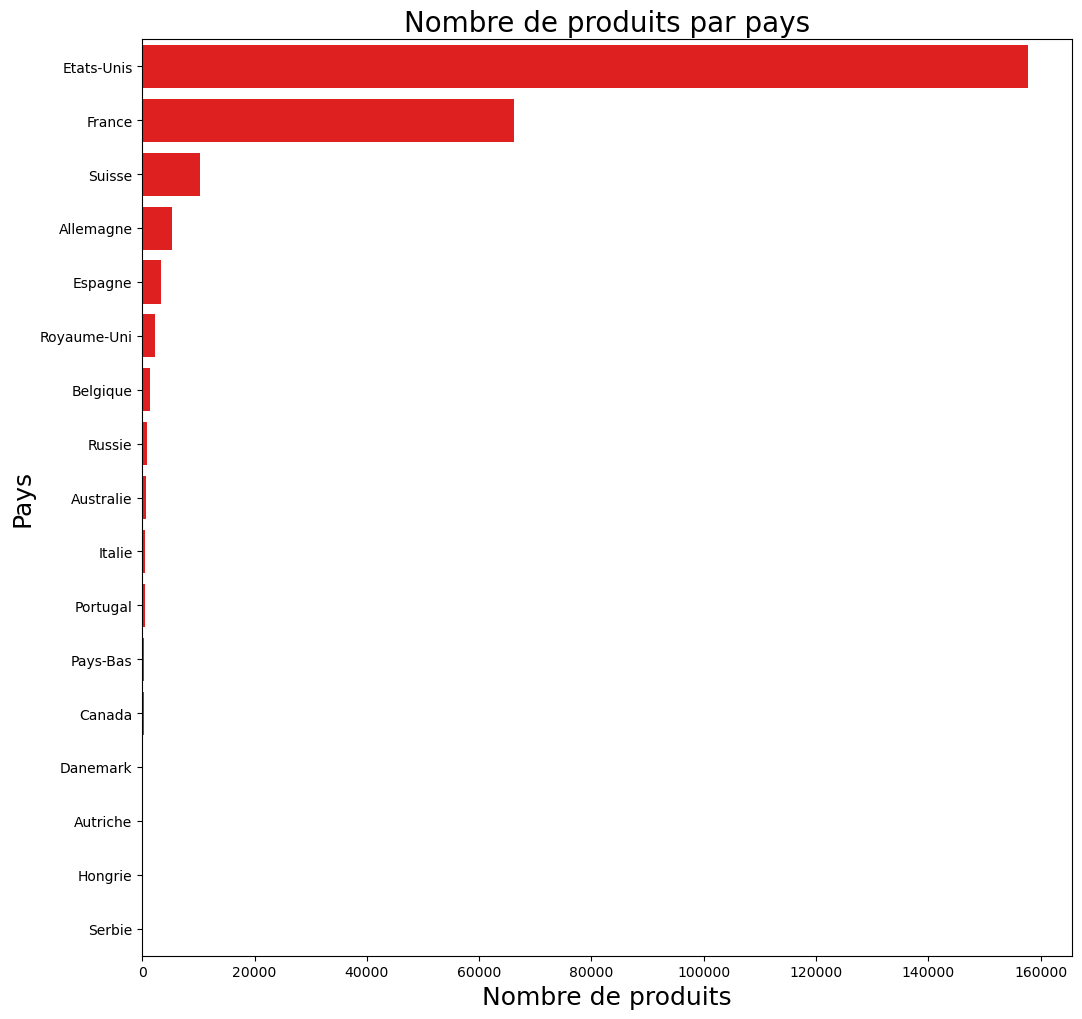

In [36]:
distributionPays(data)

Seulement 16 pays ont plus de 100 produits entrés sur la database.

La majorité des produits entrés proviennent (62%) des Etats-Unis. Le second pays représenté est la France, avec moitié moins de produits (27%)

,index,countries_fr,pourcent
0,Etats-Unis,157739,62.726517
1,France,66162,26.309992
2,Suisse,10212,4.060906
3,Allemagne,5305,2.109587
4,Espagne,3271,1.300746
5,Royaume-Uni,2344,0.932115
6,Belgique,1393,0.553941


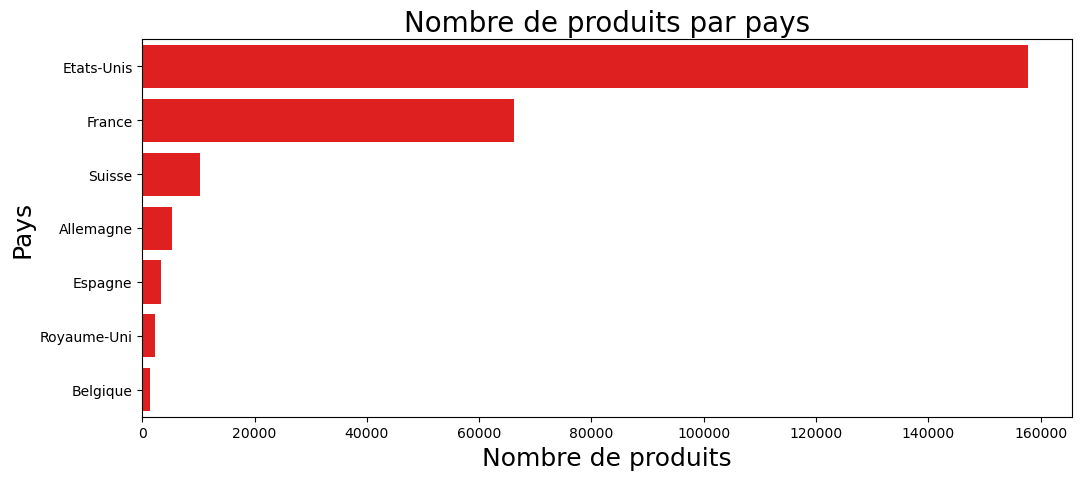

In [37]:
distributionPays(data, 1000)

In [38]:
# On appel notre fonction afin d'éliminer les features avec 100 % de valeurs manquantes
data = eliminationFeature(data, 100, "==")

On passe de 146 à 141 features
Avec cette liste de features éliminées :


27                              cities
36                        allergens_fr
70                   behenic-acid_100g
82    dihomo-gamma-linolenic-acid_100g
85                   gondoic-acid_100g
Name: Features, dtype: object

***
# <a name = "T3"> Valeurs aberrantes et manquantes </a>

### <a name = "T3C1">a. Observation des valeurs nutritives </a>

On avait déjà observé toute à l'heure des valeurs aberrantes pour les données /100g. On va les analyser plus en détail.

In [39]:
# on créé une liste des noms comprenant les features /100g.
poids_cols = [col for col in data.columns if "100g" in col]
display(poids_cols)

['energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'montanic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'sucrose_100g',
 'glucose_100g',
 'fructose_100g',
 'lactose_100g',
 'maltose_100g',
 'maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 'fiber_100g',
 'proteins_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'vitamin-a_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin

In [40]:
# On élimine de la liste l'énergie, le nutriscore et 'carbon-footprint_100g'
remove_list = ['energy_100g','energy-from-fat_100g','nutrition-score-fr_100g','nutrition-score-uk_100g', 'carbon-footprint_100g']

poids_cols = [i for i in poids_cols if i not in remove_list]

In [41]:
with pd.option_context('display.max_columns', None):
    display(data[poids_cols].describe())

,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g
count,229815.000000,218853.000000,1.0,2.000000,4.000000,1.0,1.0,1.0,1.000,1.0,20846.000000,20861.000000,851.000000,189.000000,37.000000,56.000000,195.000000,149.000000,8.000000,1.000,21.000000,14.000000,132454.000000,133398.000000,229503.000000,232799.000000,70.000000,23.000000,38.000000,290.000000,4.000000,11.000000,301.000000,420.000000,190946.000000,245872.000000,26.000000,15.000000,8.000000,241624.000000,241584.000000,4331.000000,127747.000000,28.000000,6385.000000,1337.000000,870.000000,131002.000000,10589.000000,10296.000000,11005.000000,6284.000000,4983.000000,2881.000000,4.916000e+03,301.000000,2360.000000,52.000000,101.000000,22817.000000,176.000000,131492.000000,5516.000000,130750.000000,6013.000000,3660.000000,1964.000000,1555.000000,86.000000,1062.000000,20.000000,10.000000,251.000000,82.000000,29.000000,55.000000,3098.000000,164.000000,1121.000000
mean,12.627786,5.117767,7.4,6.040000,36.136182,18.9,8.1,3.0,0.064,61.0,9.386819,5.729660,3.179714,2.559989,3.383757,0.748589,16.151995,3.742745,0.057000,0.095,40.192857,24.114286,0.076817,0.020052,32.397032,15.924190,11.694286,2.182609,25.981579,6.268897,20.825000,12.163636,32.722425,49.828693,2.874339,7.131860,4.552692,2.546667,0.021637,2.003511,0.788912,7.735163,0.000204,0.615547,0.000009,0.054829,0.036104,0.024593,0.336150,0.258090,0.014703,0.039104,0.007354,0.215181,9.595202e-05,0.000085,0.060837,0.011455,0.129704,0.434008,0.082205,0.125598,0.639058,0.003692,0.551420,0.008839,0.027618,0.003079,0.011493,0.003461,0.001688,0.000437,0.000446,1.518064,0.158900,6.392713,31.785207,15.396341,50.573595
std,17.011675,7.969273,NaN,0.226274,24.101433,NaN,NaN,NaN,NaN,NaN,15.567137,9.813409,5.470238,8.649802,14.090175,1.625047,17.499896,6.321809,0.025534,NaN,25.175674,25.273527,1.597867,0.371946,29.593142,22.099684,14.229871,4.945398,29.936698,14.068650,16.020066,8.372129,24.068017,33.535053,13.148478,8.364621,2.983399,2.257327,0.003281,131.876491,51.924174,10.956880,0.014196,2.821313,0.000378,0.691859,1.059469,2.319077,2.691665,1.305189,0.277930,1.712778,0.343767,5.272319,5.726063e-03,0.000551,1.492601,0.035049,0.237264,13.047567,0.142575,3.431173,12.412096,0.216103,13.765131,0.095721,0.946711,0.028617,0.065180,0.109597,0.006697,0.001172,0.001306,6.322815,0.178073,2.153242,32.069868,3.773688,19.161187
min,0.000000,0.000000,7.4,5.880000,0.044730,18.9,8.1,3.0,0.064,61.0,0.000000,0.000000,0.000000,0.000000,0.050000,0.041000,0.050000,0.090000,0.007000,0.095,1.000000,1.080000,-3.570000,0.000000,0.000000,-17.860000,0.000000,0.000000,0.000000,0.000000,0.100000,1.500000,0.000000,0.000000,-6.700000,-800.000000,0.920000,0.300000,0.015500,0.000000,0.000000,0.000000,-0.000340,0.000000,0.000000,0.000000,0.000000,-0.002100,0.000000,

- On observe:
    - Des valeurs négatives
        - Erreurs de saisie (- au lieu de +)
    - Des valeurs > 100g/100g
    - Des valeurs > 100 à 1000 fois supérieurs à la médiane
        - Pour les deux catégories, une erreur entre mg et g
    
- Résolution:
     - Valeurs négatives, passer en positives
     - Diviser par 1000 quand on voit que la valeur est trop éloignée de la médiane (valeur aberrante)

In [42]:
# Fonction permettant de tester si la modification impacte significativement la distribution de nos échantillons ou non
# Retourne True si la modification ne change pas significativement les données
# Retourne False si la modification ne change pas significativement les données
def resultcorrection_ttest(old_df, new_df, feature, paired = False):
    # Si les dataframes à comparer sont différents, on fait le test
    if old_df[feature].equals(new_df[feature]) == False:
       
       # Si on a plus de 1 valeur, on fait le test
        if(old_df[feature].count() > 1):
            
            if paired == True:
                # On exclu les valeurs NaN
                result_test = stats.ttest_rel(old_df[feature], new_df[feature], nan_policy = "omit")
                    
            else :
                
                if old_df[feature].notnull().sum() > new_df[feature].notnull().sum():
                    condition = old_df.index.isin(new_df.index)
                    result_test = stats.ttest_ind(old_df[feature][condition], new_df[feature], nan_policy = "omit")
                    
                if old_df[feature].notnull().sum() < new_df[feature].notnull().sum():
                    condition = new_df.index.isin(old_df.index)
                    result_test = stats.ttest_ind(old_df[feature], new_df[feature][condition], nan_policy = "omit")
                    
                if old_df[feature].notnull().sum() == new_df[feature].notnull().sum():
                    result_test = stats.ttest_ind(old_df[feature], new_df[feature], nan_policy = "omit")

        if result_test[1] <= 0.05:
            print(feature,": la modification change drastiquement les données, p_value:", result_test[1])
            graphique_boxplot(old_df[feature], new_df[feature], feature)
            standard_variation(old_df[feature], new_df[feature])
            return False

        else:
            return True
        

def graphique_boxplot(old_df, new_df, feature):
    pdFig = pd.DataFrame(columns = ["Avant", "Après"])
    pdFig["Avant"] = old_df
    pdFig["Après"] = new_df
    
    plt.figure(figsize=(5,5))
    plt.title("Distribution de la feature : "+str(feature), fontsize = 14)
    plt.ylabel("g/100g", fontsize=14)
    sns.boxplot(data = pdFig)
    plt.show()

def standard_variation(old_df, new_df):
    
    sv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

    sv_old = sv(old_df)
    sv_new = sv(new_df)

    print("Calcul du coefficient de variation :")
    print("Avant traitement = ", sv_old)
    print("Après traitement = ", sv_new)

#### <a name = "T3C2">2. Valeurs négatives</a>

Etant donné que les valeurs négatives sont potentiellement issues d'une mauvaise entrée, on va les corriger en les mettant en positif.

La modification ne devrait pas modifier la distribution de nos échantillons (test stats)

In [43]:
# Fonction pour corriger si la valeur entrée est négative
def corr_absolu(df, feature):
   
    for col in feature:
        # On regarde si une modification doit être réalisée
        
        if df.loc[df[col] < 0, col].count() > 0:
            
            #Test statistique de la modification
            mask = copy.deepcopy(df)
            mask.loc[df[col] < 0, col] = abs(mask.loc[df[col] < 0, col])
            
            #if resultcorrection_paired(df, mask, col) == True:
            if resultcorrection_ttest(df, mask, col, True) == True:
                df.loc[df[col] < 0, col] =  abs(df.loc[df[col] < 0, col])

    return df

In [44]:
data = corr_absolu(data, poids_cols)

with pd.option_context('display.max_columns', None):
    display(data[poids_cols].describe())

,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g
count,229815.000000,218853.000000,1.0,2.000000,4.000000,1.0,1.0,1.0,1.000,1.0,20846.000000,20861.000000,851.000000,189.000000,37.000000,56.000000,195.000000,149.000000,8.000000,1.000,21.000000,14.000000,132454.000000,133398.000000,229503.000000,232799.000000,70.000000,23.000000,38.000000,290.000000,4.000000,11.000000,301.000000,420.000000,190946.000000,245872.000000,26.000000,15.000000,8.000000,241624.000000,241584.000000,4331.000000,127747.000000,28.000000,6385.000000,1337.000000,870.000000,131002.000000,10589.000000,10296.000000,11005.000000,6284.000000,4983.000000,2881.000000,4.916000e+03,301.000000,2360.000000,52.000000,101.000000,22817.000000,176.000000,131492.000000,5516.000000,130750.000000,6013.000000,3660.000000,1964.000000,1555.000000,86.000000,1062.000000,20.000000,10.000000,251.000000,82.000000,29.000000,55.000000,3098.000000,164.000000,1121.000000
mean,12.627786,5.117767,7.4,6.040000,36.136182,18.9,8.1,3.0,0.064,61.0,9.386819,5.729660,3.179714,2.559989,3.383757,0.748589,16.151995,3.742745,0.057000,0.095,40.192857,24.114286,0.076943,0.020052,32.397032,15.924503,11.694286,2.182609,25.981579,6.268897,20.825000,12.163636,32.722425,49.828693,2.874410,7.142464,4.552692,2.546667,0.021637,2.003511,0.788912,7.735163,0.000204,0.615547,0.000009,0.054829,0.036104,0.024593,0.336150,0.258090,0.014703,0.039104,0.007354,0.215181,9.595202e-05,0.000085,0.060837,0.011455,0.129704,0.434008,0.082205,0.125598,0.639058,0.003692,0.551420,0.008839,0.034641,0.003079,0.011493,0.003461,0.001688,0.000437,0.000446,1.518064,0.158900,6.392713,31.785207,15.396341,50.573595
std,17.011675,7.969273,NaN,0.226274,24.101433,NaN,NaN,NaN,NaN,NaN,15.567137,9.813409,5.470238,8.649802,14.090175,1.625047,17.499896,6.321809,0.025534,NaN,25.175674,25.273527,1.597861,0.371946,29.593142,22.099459,14.229871,4.945398,29.936698,14.068650,16.020066,8.372129,24.068017,33.535053,13.148462,8.355569,2.983399,2.257327,0.003281,131.876491,51.924174,10.956880,0.014196,2.821313,0.000378,0.691859,1.059469,2.319077,2.691665,1.305189,0.277930,1.712778,0.343767,5.272319,5.726063e-03,0.000551,1.492601,0.035049,0.237264,13.047567,0.142575,3.431173,12.412096,0.216103,13.765131,0.095721,0.946480,0.028617,0.065180,0.109597,0.006697,0.001172,0.001306,6.322815,0.178073,2.153242,32.069868,3.773688,19.161187
min,0.000000,0.000000,7.4,5.880000,0.044730,18.9,8.1,3.0,0.064,61.0,0.000000,0.000000,0.000000,0.000000,0.050000,0.041000,0.050000,0.090000,0.007000,0.095,1.000000,1.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.500000,0.000000,0.000000,0.000000,0.000000,0.920000,0.300000,0.015500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

**Il n'y a plus de valeurs négatives**

##### <a name = "T3C3">3. Valeurs à la mauvaise unité</a>

On repère ces valeurs car elles sont soient :
- supérieure à 100/100g
- 100 à 1000 fois supérieures à la médiane


In [45]:
# On élimine de la liste le sodium et le salt, car cas particuliers
remove_list = ['salt_100g','sodium_100g']
poids_cols = [i for i in poids_cols if i not in remove_list]

In [46]:
with pd.option_context('display.max_columns', None):
    display(data[poids_cols].describe())

,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g
count,229815.000000,218853.000000,1.0,2.000000,4.000000,1.0,1.0,1.0,1.000,1.0,20846.000000,20861.000000,851.000000,189.000000,37.000000,56.000000,195.000000,149.000000,8.000000,1.000,21.000000,14.000000,132454.000000,133398.000000,229503.000000,232799.000000,70.000000,23.000000,38.000000,290.000000,4.000000,11.000000,301.000000,420.000000,190946.000000,245872.000000,26.000000,15.000000,8.000000,4331.000000,127747.000000,28.000000,6385.000000,1337.000000,870.000000,131002.000000,10589.000000,10296.000000,11005.000000,6284.000000,4983.000000,2881.000000,4.916000e+03,301.000000,2360.000000,52.000000,101.000000,22817.000000,176.000000,131492.000000,5516.000000,130750.000000,6013.000000,3660.000000,1964.000000,1555.000000,86.000000,1062.000000,20.000000,10.000000,251.000000,82.000000,29.000000,55.000000,3098.000000,164.000000,1121.000000
mean,12.627786,5.117767,7.4,6.040000,36.136182,18.9,8.1,3.0,0.064,61.0,9.386819,5.729660,3.179714,2.559989,3.383757,0.748589,16.151995,3.742745,0.057000,0.095,40.192857,24.114286,0.076943,0.020052,32.397032,15.924503,11.694286,2.182609,25.981579,6.268897,20.825000,12.163636,32.722425,49.828693,2.874410,7.142464,4.552692,2.546667,0.021637,7.735163,0.000204,0.615547,0.000009,0.054829,0.036104,0.024593,0.336150,0.258090,0.014703,0.039104,0.007354,0.215181,9.595202e-05,0.000085,0.060837,0.011455,0.129704,0.434008,0.082205,0.125598,0.639058,0.003692,0.551420,0.008839,0.034641,0.003079,0.011493,0.003461,0.001688,0.000437,0.000446,1.518064,0.158900,6.392713,31.785207,15.396341,50.573595
std,17.011675,7.969273,NaN,0.226274,24.101433,NaN,NaN,NaN,NaN,NaN,15.567137,9.813409,5.470238,8.649802,14.090175,1.625047,17.499896,6.321809,0.025534,NaN,25.175674,25.273527,1.597861,0.371946,29.593142,22.099459,14.229871,4.945398,29.936698,14.068650,16.020066,8.372129,24.068017,33.535053,13.148462,8.355569,2.983399,2.257327,0.003281,10.956880,0.014196,2.821313,0.000378,0.691859,1.059469,2.319077,2.691665,1.305189,0.277930,1.712778,0.343767,5.272319,5.726063e-03,0.000551,1.492601,0.035049,0.237264,13.047567,0.142575,3.431173,12.412096,0.216103,13.765131,0.095721,0.946480,0.028617,0.065180,0.109597,0.006697,0.001172,0.001306,6.322815,0.178073,2.153242,32.069868,3.773688,19.161187
min,0.000000,0.000000,7.4,5.880000,0.044730,18.9,8.1,3.0,0.064,61.0,0.000000,0.000000,0.000000,0.000000,0.050000,0.041000,0.050000,0.090000,0.007000,0.095,1.000000,1.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.500000,0.000000,0.000000,0.000000,0.000000,0.920000,0.300000,0.015500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000008,0.000006,0.000000,0.000002,0.00

In [47]:
# Fonction permettant de corriger les valeurs mal entrée ou corrigée entre 100 et 110.
def ajustement(df, feature):
    df.loc[(df[feature] > 100) & (df[feature] <= 110), feature] = 100

    #On élimine quand c'est trop extrêmes
    index_elim = df[df[feature] > 110].index
    
    if(len(index_elim) > 0):
        df = df[~df.index.isin(index_elim)]
        print(len(index_elim),"lignes supprimées")
        
    return df

In [48]:
## Version 1

def mauvaiseUnite_corr(df) :
    
    remove_list = ['energy_100g','energy-from-fat_100g','nutrition-score-fr_100g','nutrition-score-uk_100g','carbon-footprint_100g']
    
    poids_cols = [col for col in df.columns if ("100g" in col) & (col not in remove_list)]
    
    with pd.option_context('display.max_columns', None):
        print("Avant correction :")
        display(df[poids_cols].describe())
    
    mask = copy.deepcopy(df)
    
    # Si on trouve une colonne où la valeur est >1000, on divise toutes les colonnes par 1000
    liste_valeurs_1000 = [y for col in poids_cols for y in df[df[col] > 1000].index]   
    # On garde l'indice quand une valeur excédentaire est retrouvée dans plus de 1 colonne 
    liste_valeurs_1000 = list(set([i for i in liste_valeurs_1000 if liste_valeurs_1000.count(i) >= 1])) 
    # On divise par 1000
    df.loc[df.index.isin(liste_valeurs_1000), poids_cols] = df.loc[df.index.isin(liste_valeurs_1000), poids_cols] / 1000
    
    # Si on retrouve une colonne où la valeur est > 100 et qu'une seconde l'est, on divise par 1000     
    # On récupère les indices où on retrouve une valeur > 100
    liste_valeurs_100 = [y for col in poids_cols for y in df[df[col] > 100].index]
    # On garde l'indice quand une valeur excédentaire est retrouvée dans plus de 2 colonnes 
    liste_valeurs_100 = list(set([i for i in liste_valeurs_100 if liste_valeurs_100.count(i) >= 2]))
    # On divise par 1000
    df.loc[df.index.isin(liste_valeurs_100), poids_cols] = df.loc[df.index.isin(liste_valeurs_100), poids_cols] / 1000
    
    # Test statistique
    for col in poids_cols:
        resultcorrection_ttest(mask, df, col, False)
    
    nb_ligne = df.shape[0]
    remove_list = ['energy_100g','energy-from-fat_100g','nutrition-score-fr_100g','nutrition-score-uk_100g','sodium_100g', "salt_100g",'carbon-footprint_100g']
    
    poids_cols = [col for col in df.columns if ("100g" in col) & (col not in remove_list)]
    for col in poids_cols :
        mask = copy.deepcopy(df)
        # Trans fat est à part. Il y a des aliments riches en trans fat
        if col != "trans-fat_100g":
            #Quand la moyenne/median est inférieur à 1. On cherche les outliers qui sont 50 fois supérieur.
            if df[col].median() > 0:
                med = df[col].median()
            else :
                med = df[col].mean()

            condition = (med < 1) & (df[col] > med * 50)
            
            #Tant qu'on est pas satisfait de la nouvelle valeur, on continue (le cas des valeurs qui sont 10^6 à leur vrai valeurs).
            while df.loc[condition, col].shape[0] > 0:
                condition = (med < 1) & (df[col] > med * 50)
                if df[col].median() > 0:
                    med = df[col].median()
                else :
                    med = df[col].mean()

                df.loc[condition, col] = (
                df.loc[condition, col].apply(lambda x: (x/100) 
                    if (abs(med - x / 100) < abs(med - x / 1000)) else (x/1000))) 
                
        
        # Test statistique
        resultcorrection_ttest(mask, df, col, False)
        
        # Si la valeur est comprise entre 100 et 110, elle est corrigée encore aberrante, elle est éliminée
        df = ajustement(df, col)    
    
    print("On passe de %d" %nb_ligne, end = " ")
    print("à %d lignes" %df.shape[0], end = " ")
    print("(- %d)" %(nb_ligne - df.shape[0]))
        
    with pd.option_context('display.max_columns', None):
        print("Après correction :")
        display(df[poids_cols].describe())
        
    return df

In [49]:
# Pour garder en mémoire
carboAvant = copy.deepcopy(data["carbohydrates_100g"])

Avant correction :


,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g
count,229815.000000,218853.000000,1.0,2.000000,4.000000,1.0,1.0,1.0,1.000,1.0,20846.000000,20861.000000,851.000000,189.000000,37.000000,56.000000,195.000000,149.000000,8.000000,1.000,21.000000,14.000000,132454.000000,133398.000000,229503.000000,232799.000000,70.000000,23.000000,38.000000,290.000000,4.000000,11.000000,301.000000,420.000000,190946.000000,245872.000000,26.000000,15.000000,8.000000,241624.000000,241584.000000,4331.000000,127747.000000,28.000000,6385.000000,1337.000000,870.000000,131002.000000,10589.000000,10296.000000,11005.000000,6284.000000,4983.000000,2881.000000,4.916000e+03,301.000000,2360.000000,52.000000,101.000000,22817.000000,176.000000,131492.000000,5516.000000,130750.000000,6013.000000,3660.000000,1964.000000,1555.000000,86.000000,1062.000000,20.000000,10.000000,251.000000,82.000000,29.000000,55.000000,3098.000000,164.000000,1121.000000
mean,12.627786,5.117767,7.4,6.040000,36.136182,18.9,8.1,3.0,0.064,61.0,9.386819,5.729660,3.179714,2.559989,3.383757,0.748589,16.151995,3.742745,0.057000,0.095,40.192857,24.114286,0.076943,0.020052,32.397032,15.924503,11.694286,2.182609,25.981579,6.268897,20.825000,12.163636,32.722425,49.828693,2.874410,7.142464,4.552692,2.546667,0.021637,2.003511,0.788912,7.735163,0.000204,0.615547,0.000009,0.054829,0.036104,0.024593,0.336150,0.258090,0.014703,0.039104,0.007354,0.215181,9.595202e-05,0.000085,0.060837,0.011455,0.129704,0.434008,0.082205,0.125598,0.639058,0.003692,0.551420,0.008839,0.034641,0.003079,0.011493,0.003461,0.001688,0.000437,0.000446,1.518064,0.158900,6.392713,31.785207,15.396341,50.573595
std,17.011675,7.969273,NaN,0.226274,24.101433,NaN,NaN,NaN,NaN,NaN,15.567137,9.813409,5.470238,8.649802,14.090175,1.625047,17.499896,6.321809,0.025534,NaN,25.175674,25.273527,1.597861,0.371946,29.593142,22.099459,14.229871,4.945398,29.936698,14.068650,16.020066,8.372129,24.068017,33.535053,13.148462,8.355569,2.983399,2.257327,0.003281,131.876491,51.924174,10.956880,0.014196,2.821313,0.000378,0.691859,1.059469,2.319077,2.691665,1.305189,0.277930,1.712778,0.343767,5.272319,5.726063e-03,0.000551,1.492601,0.035049,0.237264,13.047567,0.142575,3.431173,12.412096,0.216103,13.765131,0.095721,0.946480,0.028617,0.065180,0.109597,0.006697,0.001172,0.001306,6.322815,0.178073,2.153242,32.069868,3.773688,19.161187
min,0.000000,0.000000,7.4,5.880000,0.044730,18.9,8.1,3.0,0.064,61.0,0.000000,0.000000,0.000000,0.000000,0.050000,0.041000,0.050000,0.090000,0.007000,0.095,1.000000,1.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.500000,0.000000,0.000000,0.000000,0.000000,0.920000,0.300000,0.015500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

1 lignes supprimées
alpha-linolenic-acid_100g : la modification change drastiquement les données, p_value: 0.0019604323147608253


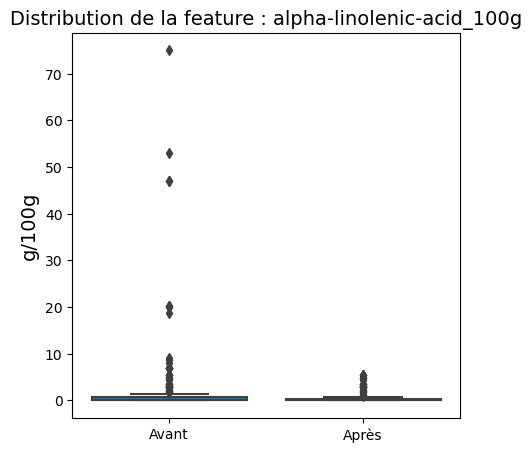

Calcul du coefficient de variation :
Avant traitement =  337.88429438677946
Après traitement =  200.78562495329913
4 lignes supprimées
5 lignes supprimées
lactose_100g : la modification change drastiquement les données, p_value: 1.7160403720778212e-13


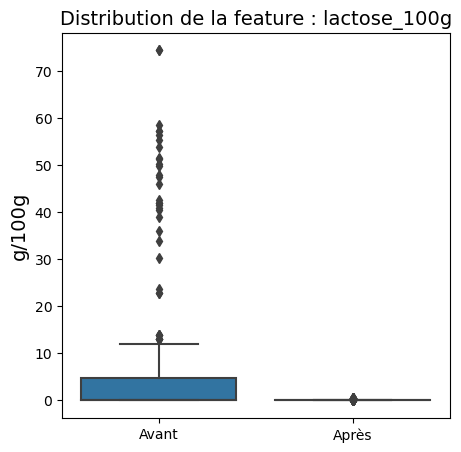

Calcul du coefficient de variation :
Avant traitement =  224.41988054129834
Après traitement =  282.2257843413767
2 lignes supprimées
2 lignes supprimées
vitamin-e_100g : la modification change drastiquement les données, p_value: 0.017595248640294936


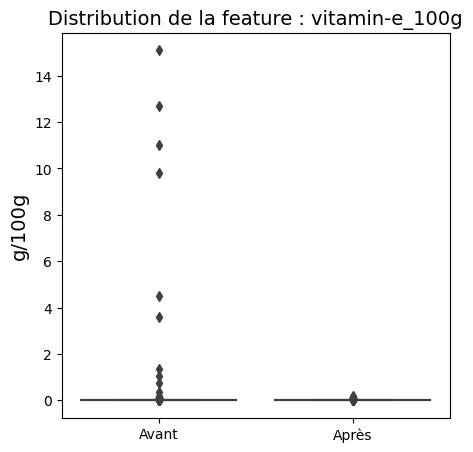

Calcul du coefficient de variation :
Avant traitement =  1261.8543724075143
Après traitement =  140.64927514329227
vitamin-c_100g : la modification change drastiquement les données, p_value: 0.00972655338622698


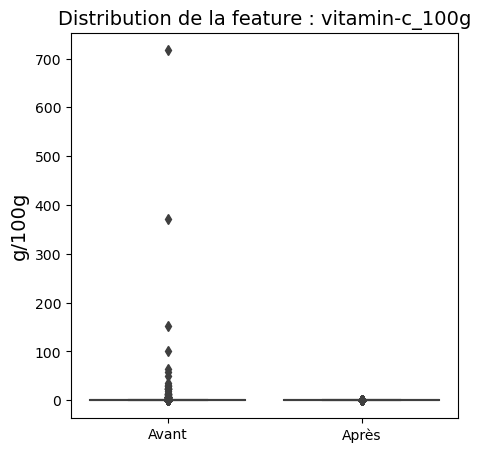

Calcul du coefficient de variation :
Avant traitement =  9432.549136602525
Après traitement =  480.07428065545855
vitamin-b1_100g : la modification change drastiquement les données, p_value: 1.7685548895903258e-20


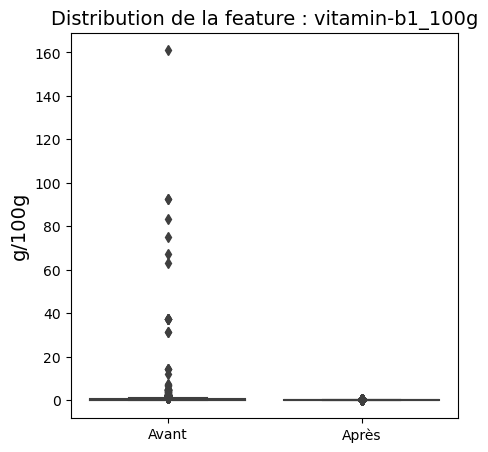

Calcul du coefficient de variation :
Avant traitement =  800.7321342192789
Après traitement =  175.44261941313553
vitamin-b2_100g : la modification change drastiquement les données, p_value: 9.799294459386072e-31


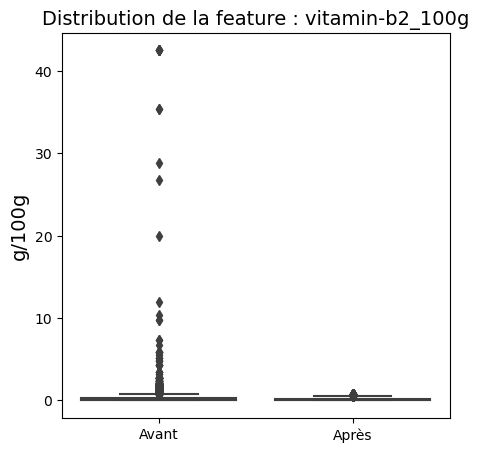

Calcul du coefficient de variation :
Avant traitement =  505.7112882458679
Après traitement =  149.70408139409972
vitamin-pp_100g : la modification change drastiquement les données, p_value: 0.016907075388222316


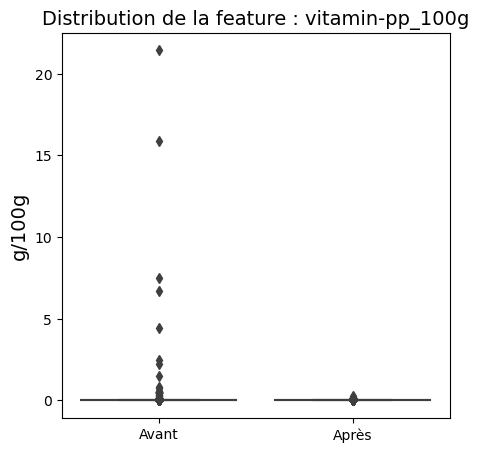

Calcul du coefficient de variation :
Avant traitement =  1890.2650565892102
Après traitement =  163.63811459054696
folates_100g : la modification change drastiquement les données, p_value: 0.028630325612557957


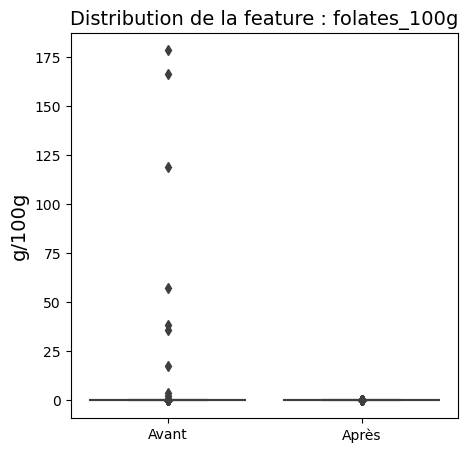

Calcul du coefficient de variation :
Avant traitement =  2450.180327310437
Après traitement =  151.88328644701707
potassium_100g : la modification change drastiquement les données, p_value: 0.03602034049870964


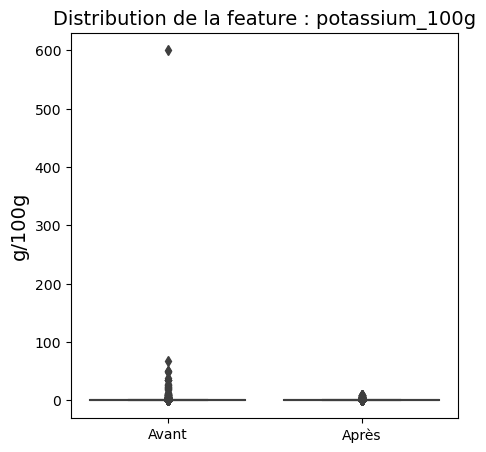

Calcul du coefficient de variation :
Avant traitement =  1170.3730709728152
Après traitement =  133.56143943656454
chloride_100g : la modification change drastiquement les données, p_value: 6.735674572712282e-08


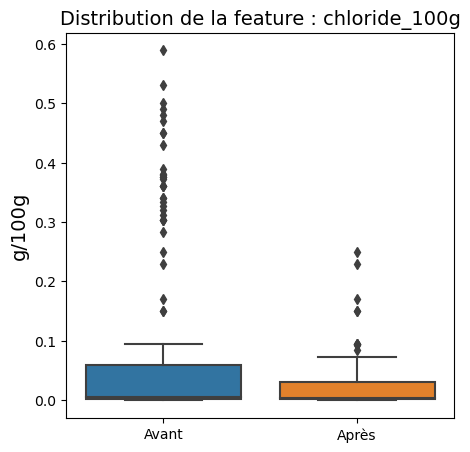

Calcul du coefficient de variation :
Avant traitement =  173.43702467373384
Après traitement =  182.98313424277265
calcium_100g : la modification change drastiquement les données, p_value: 0.000510030595412935


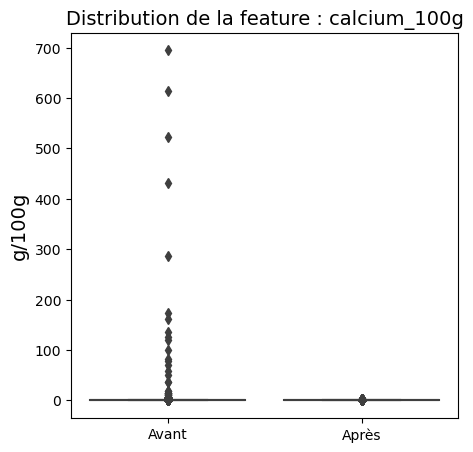

Calcul du coefficient de variation :
Avant traitement =  2732.718213307719
Après traitement =  184.6860121628647
phosphorus_100g : la modification change drastiquement les données, p_value: 0.023527433908285145


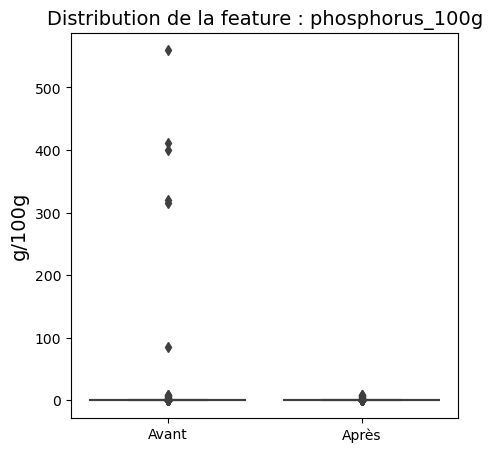

Calcul du coefficient de variation :
Avant traitement =  1942.2484006678292
Après traitement =  118.93829228184678
iron_100g : la modification change drastiquement les données, p_value: 0.0020076627472418777


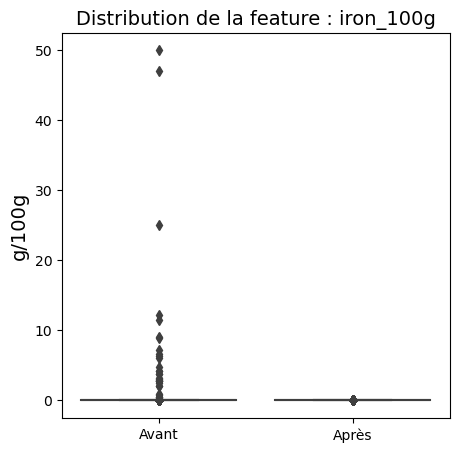

Calcul du coefficient de variation :
Avant traitement =  5853.956204874859
Après traitement =  179.57205424945312
magnesium_100g : la modification change drastiquement les données, p_value: 0.012190787497682102


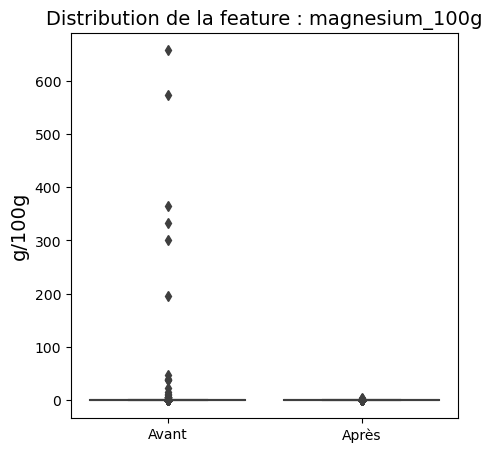

Calcul du coefficient de variation :
Avant traitement =  2496.7337680169935
Après traitement =  139.95238448123027
zinc_100g : la modification change drastiquement les données, p_value: 0.042945987161397164


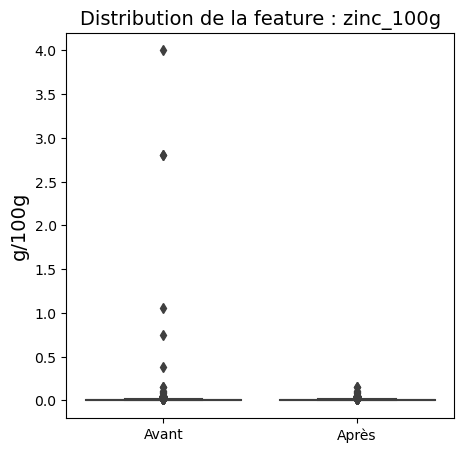

Calcul du coefficient de variation :
Avant traitement =  1082.9038150204233
Après traitement =  134.51689558564274
manganese_100g : la modification change drastiquement les données, p_value: 0.019028850487017163


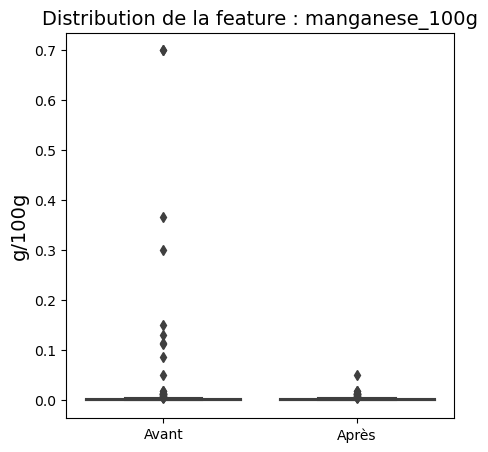

Calcul du coefficient de variation :
Avant traitement =  929.4887322342342
Après traitement =  150.9376466568492
iodine_100g : la modification change drastiquement les données, p_value: 2.5208362441424445e-06


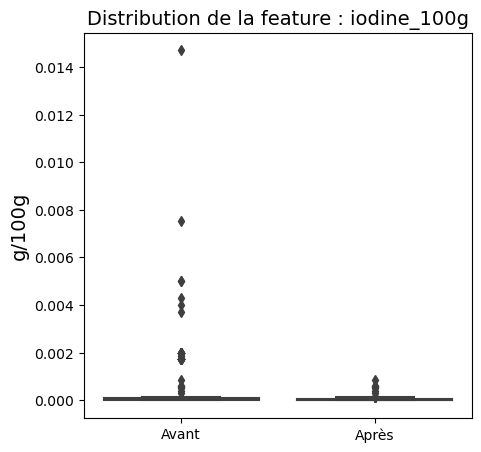

Calcul du coefficient de variation :
Avant traitement =  292.9583558078485
Après traitement =  180.65739854547073
caffeine_100g : la modification change drastiquement les données, p_value: 0.037878934211685505


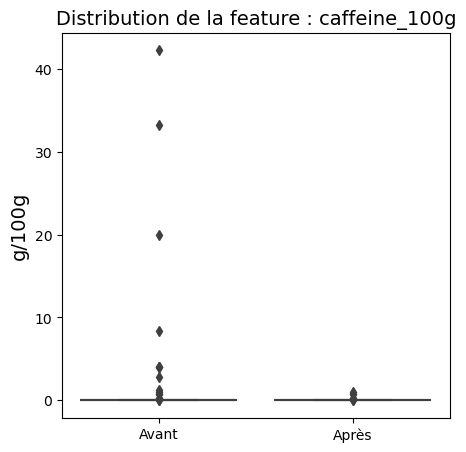

Calcul du coefficient de variation :
Avant traitement =  416.50528037661337
Après traitement =  291.04674582133276
On passe de 251471 à 251457 lignes (- 14)
Après correction :


,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g
count,229805.000000,218844.000000,1.0,2.000000,4.000000,1.0,1.0,1.0,1.000,1.0,20846.000000,20861.000000,851.000000,189.000000,37.000000,56.000000,195.000000,149.000000,8.000000,1.000,21.000000,14.000000,132449.000000,133392.000000,229490.000000,232789.000000,70.000000,23.000000,38.000000,290.000000,4.000000,11.000000,301.000000,420.000000,190937.000000,245859.000000,26.000000,15.000000,8.000000,4331.000000,127740.000000,28.000000,6385.000000,1337.000000,870.000000,130995.000000,10589.000000,10296.000000,11005.000000,6284.000000,4983.000000,2881.000000,4.916000e+03,301.000000,2360.000000,52.000000,101.000000,22816.000000,176.000000,131485.000000,5516.000000,130744.000000,6013.000000,3660.000000,1964.000000,1555.000000,86.000000,1062.000000,20.000000,10.000000,251.000000,82.000000,29.000000,55.000000,3097.000000,164.000000,1121.000000
mean,12.622016,5.112691,7.4,6.040000,36.136182,18.9,8.1,3.0,0.064,61.0,9.358588,5.726513,3.179714,0.580418,1.109432,0.748589,16.151995,3.742745,0.057000,0.095,40.192857,24.114286,0.070813,0.018111,32.373135,15.902362,11.694286,2.182609,23.326342,0.032105,20.825000,12.163636,32.722425,49.828693,2.842624,7.134780,4.552692,2.546667,0.021637,7.735163,0.000142,0.030868,0.000003,0.009872,0.000092,0.008018,0.092835,0.108451,0.008367,0.001160,0.000080,0.000154,3.474533e-06,0.000023,0.003651,0.006696,0.129704,0.294608,0.020837,0.092634,0.260397,0.001845,0.106278,0.005626,0.000677,0.001372,0.000213,0.000036,0.000041,0.000065,0.000052,0.055948,0.158900,6.392713,31.795470,15.396341,50.573595
std,16.931071,7.860498,NaN,0.226274,24.101433,NaN,NaN,NaN,NaN,NaN,15.097692,9.807089,5.470238,1.165396,2.891625,1.625047,17.499896,6.321809,0.025534,NaN,25.175674,25.273527,1.014116,0.037441,28.964379,20.861673,14.229871,4.945398,27.476647,0.090609,16.020066,8.372129,24.068017,33.535053,4.564238,8.095957,2.983399,2.257327,0.003281,10.956880,0.000488,0.058353,0.000004,0.013885,0.000177,0.038491,0.162873,0.162356,0.013691,0.001960,0.000143,0.000233,5.895494e-06,0.000029,0.008089,0.009548,0.237264,0.393483,0.038127,0.171081,0.309712,0.003313,0.148739,0.007568,0.000756,0.002070,0.000351,0.000044,0.000059,0.000099,0.000094,0.162834,0.178073,2.153242,32.069958,3.773688,19.161187
min,0.000000,0.000000,7.4,5.880000,0.044730,18.9,8.1,3.0,0.064,61.0,0.000000,0.000000,0.000000,0.000000,0.050000,0.041000,0.050000,0.090000,0.007000,0.095,1.000000,1.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.500000,0.000000,0.000000,0.000000,0.000000,0.920000,0.300000,0.015500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000008,0.000006,0.000000,0.000002,0.000000,0

In [50]:
# On corrige les valeurs aberantes avec notre fonction
data = mauvaiseUnite_corr(data)

Les résultats des tests statistiques montrent que pour certains nutriments, la distributions est significativement modifiées et comme on peut le voir sur les boxplot, après transformation, les outliers se retrouvent vers la médiane. Et en général, la moyenne est plus proche de la médiane après correction.

C'est confirmé par le calcul du coefficient de variation. On se rapproche de 100 pour la majorité des features (à l'exception de 2).

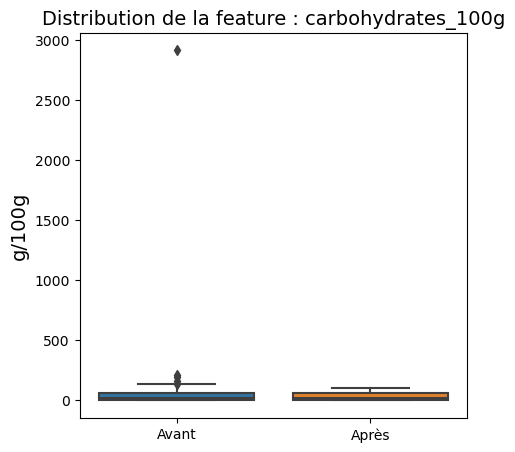

In [51]:
# Pour comparer, avant / après sur un macronutriment
graphique_boxplot(carboAvant, data["carbohydrates_100g"], "carbohydrates_100g")

On observe encore des valeurs aberrantes :

    - On peut retrouver 100 % de fat dans certains produits (huiles d'olives par exemple)
    - On peut retrouver 100 % de carbohydrates dans certains produits également
    
    - C'est anormal d'avoir autant de fibre (100%), surtout si nous comparons à la moyenne et ecart-type
    - Pareil pour les protéines (produits hyperprotéinés ne sont pas autant pourvus)


Regardons pour les protéines à 100/100g

In [52]:
with pd.option_context('display.max_columns', None):
    display(data.loc[data["proteins_100g"] == 100])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2466,11110673671,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489143364,2017-03-10T10:56:04Z,1489143364,2017-03-10T10:56:04Z,Unflavored Gelatin,NaN,NaN,NaN,NaN,"Kroger, The Kroger Co.","kroger,the-kroger-co",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,Etats-Unis,Gelatin.,NaN,NaN,NaN,NaN,7 g (0.25 ONZ),1.0,[ gelatin -> en:e428 -> exists -- ok ],en:e428,E428 - Gélatine,0.0,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1795.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36909,41250698784,http://world-fr.openfoodfacts.org/produit/0041...,usda-ndb-import,1489057821,2017-03-09T11:10:21Z,1489057821,2017-03-09T11:10:21Z,Unflavored Gelatin,NaN,NaN,NaN,NaN,Meijer,meijer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,Etats-Unis,Gelatin.,NaN,NaN,NaN,NaN,7 g (7 g),1.0,[ gelatin -> en:e428 -> exists -- ok ],en:e428,E428 - Gélatine,0.0,NaN,0.0,NaN,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1795.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,100.0,NaN,NaN,NaN,0.36322,0.143000,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Na

On peut observer que de fausses informations ont été entrées (des films).

On élimine sur ce critère : "ingredients_text", si vide on enlève

In [53]:
index_elim = data.loc[(data["ingredients_text"].isnull()) & (data["proteins_100g"] == 100)].index
data = data.loc[~data.index.isin(index_elim)]

Observons les fibres à 100g/100g maintenant

In [54]:
with pd.option_context('display.max_columns', None):
    display(data.loc[data["fiber_100g"] == 100])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
9498,12511946067,http://world-fr.openfoodfacts.org/produit/0012...,usda-ndb-import,1489063583,2017-03-09T12:46:23Z,1489063583,2017-03-09T12:46:23Z,Sweeteners,NaN,NaN,NaN,NaN,Wholesome,wholesome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,Etats-Unis,"Organic agave inulin, organic stevia extract (...",NaN,NaN,NaN,NaN,1 g (0.5 tsp),1.0,[ organic-agave-inulin -> en:organic-agave-in...,en:e551,E551 - Dioxyde de silicium,0.0,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN,NaN,0.000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76568,74410530525,http://world-fr.openfoodfacts.org/produit/0074...,usda-ndb-import,1489143631,2017-03-10T11:00:31Z,1489143631,2017-03-10T11:00:31Z,"Yamashin, Powdered Agar-Agar",NaN,NaN,NaN,NaN,Wismettac Asian Foods Inc.,wismettac-asian-foods-inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,Etats-Unis,Seaweed.,NaN,NaN,NaN,NaN,4 g (1 PACKAGE),0.0,[ seaweed -> en:seaweed ],NaN,NaN,0.0,NaN,0.0,NaN,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1046.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,NaN,NaN,NaN,0.

100 g de fibre pourrait être correct pour ces aliments

#### <a name = "T3C4">4. Correction de la feature Fat_100g</a>

Le fat_100g est une feature majeure.

On recherche les valeurs pour lesquelles la somme des fats est supérieure à 'fat_100g' car ce sont des valeurs aberrantes

In [55]:
## Permet de corriger la valeur de fat_100g

def fat_corr(df):
    # Recherche des conditions où la somme des fats est plus grande que le total
    fats = ["saturated-fat_100g", "monounsaturated-fat_100g", "polyunsaturated-fat_100g", "trans-fat_100g"]

    # On récupère les index qui remplissent cette condition
    index_fat = df.loc[df[fats].sum(axis = 1) > df["fat_100g"]].index

    # On récupère les index où il n'y a pas de valeur entrées pour les fats
    index_nulle_fat = df.loc[df["fat_100g"].isnull()].index

    mask = copy.deepcopy(df)
    
    # On change la valeur par la somme
    df.loc[df.index.isin(index_fat), "fat_100g"] = df[fats].sum(axis = 1)
    df.loc[(df.index.isin(index_nulle_fat)) & (df[fats].sum(axis = 1) > 0), "fat_100g"] = df[fats].sum(axis = 1)

    print("Il y a ", index_fat.shape[0], "valeurs incorrectes et",index_nulle_fat.shape[0],"valeurs nulles.")
    print("Après correction, il y a", df.loc[(df["fat_100g"] > 100) & (df["fat_100g"] <= 110)].shape[0],"valeurs de fat entre 100 et 110 après correction")
    print("Après correction, il y a", df.loc[df["fat_100g"] > 110].shape[0], "valeurs de fat au dessus de 110 après correction")
    print("Après correction, il y a", df[df["fat_100g"].isnull()].shape[0],"valeurs de fat nulle après correction")
    
    # Pour corriger les erreurs de corrections
    df = ajustement(df, "fat_100g")
    
    
    # Test statistique
    # Sur les valeurs modifiées
    resultcorrection_ttest(mask[~mask.index.isin(index_nulle_fat)], df[~df.index.isin(index_nulle_fat)], "fat_100g", False)
    

    
    return df

In [56]:
display(data["fat_100g"].describe())

data = fat_corr(data)

display(data["fat_100g"].describe())

count    229805.000000
mean         12.622016
std          16.931071
min           0.000000
25%           0.000000
50%           5.310000
75%          20.000000
max         100.000000
Name: fat_100g, dtype: float64

Il y a  2405 valeurs incorrectes et 21647 valeurs nulles.
Après correction, il y a 117 valeurs de fat entre 100 et 110 après correction
Après correction, il y a 4 valeurs de fat au dessus de 110 après correction
Après correction, il y a 6286 valeurs de fat nulle après correction
4 lignes supprimées


count    245162.000000
mean         12.263180
std          16.679074
min           0.000000
25%           0.100000
50%           5.000000
75%          19.700000
max         100.000000
Name: fat_100g, dtype: float64

Il reste un grand nombre de valeurs nulles, néanmoins un grand nombre a pu être comblé en mesurant la valeur de fat avec les autres types de fat.

On observe que la distribution est modifié significativement. Mais la mesure du coefficient de variation montre que cette distribution est assez similaire à la distribution précédent la modification.

On tentera de compléter les valeurs manquantes par la suite.



In [57]:
## Fonction pour visualiser la distribution d'une feature

def figure_feature(df, feature, style = "violinplot"):
    plt.figure(figsize=(12,6))

    if style == "boxplot":
        sns.boxplot(data = df, y = feature, color = "red", orient = "h")    
    elif style == "violinplot":
        sns.violinplot(data = df, y = feature, color = "red", orient = "h")

    plt.title("Distribution de la feature : "+str(feature), fontsize = 18)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.xlabel(str(feature), fontsize=18)
    plt.ylabel("g/100g", fontsize=14)

    plt.show()

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


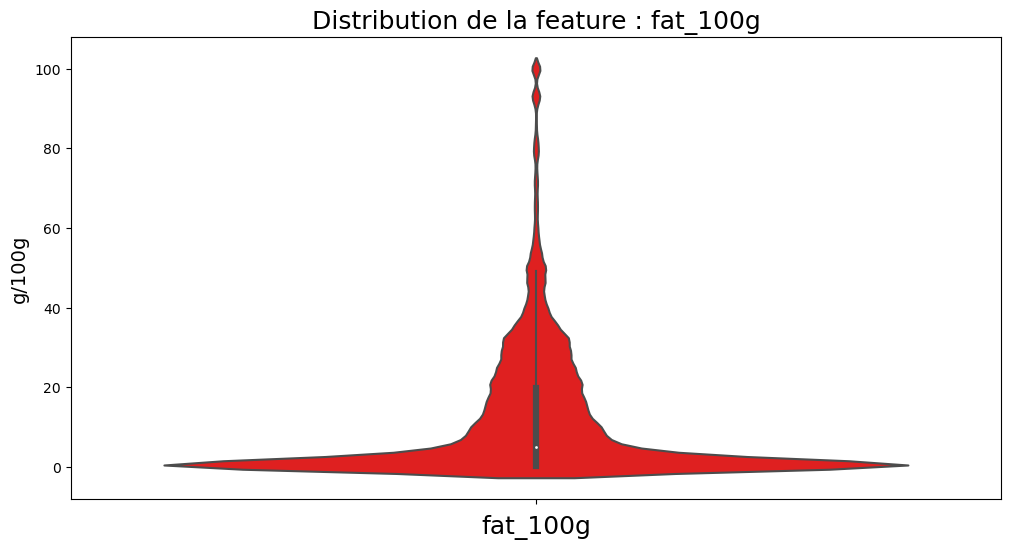

In [58]:
figure_feature(data, "fat_100g")

Une majorité des produits ont une faible teneur en gras.

#### <a name = "T3C5">5. Correction de la feature saturated-fat_100g</a>

Le saturated-fat_100g est une feature majeure.

On recherche le nombre de valeurs manquantes.

Puis on recalcul la valeur de fat-saturated_100g quand celle ci est manquante.

On pourra la mesurer à l'aide de la valeur fat remplie précédement et les autres paramètres de fat disponible.

In [59]:
def fat_saturated_corr(df):
    # Recherche des conditions où la somme des fats est plus grande que le total
    saturated = ["monounsaturated-fat_100g", "polyunsaturated-fat_100g", "trans-fat_100g"]
    
    # On récupère les index où la feature n'est pas rempli
    index_saturated = data.loc[data["saturated-fat_100g"].isnull()].index

    print("Il y a ",index_saturated.shape[0],"valeurs nulles.")

    mask = copy.deepcopy(df)
    
    # On met 0 quand fat = 0
    data.loc[(data.index.isin(index_saturated)) & (data["fat_100g"] == 0), "saturated-fat_100g"] = data["fat_100g"]
    index_saturated = data.loc[data["saturated-fat_100g"].isnull()].index

    print("Il reste ",index_saturated.shape[0],"valeurs nulles après correction avec fat = 0 = saturated_fat.")

    # On calcul saturated fat quand on a toutes les features d'entrées
    data.loc[(data.index.isin(index_saturated)) & (data[saturated].sum(axis = 1)> 0), "saturated-fat_100g"] =  data["fat_100g"] - data[saturated].sum(axis = 1)
    index_saturated = data.loc[data["saturated-fat_100g"].isnull()].index

    print("Il reste ",index_saturated.shape[0],"valeurs nulles après correction par saturated = fat - monounsat - polyunsa - trans-fat_100g")
    
    df = ajustement(df, "saturated-fat_100g")
   
    # Test statistique
    resultcorrection_ttest(mask, df, "saturated-fat_100g", False)

    return df

count    218835.000000
mean          5.111693
std           7.855197
min           0.000000
25%           0.000000
50%           1.800000
75%           7.140000
max         100.000000
Name: saturated-fat_100g, dtype: float64

Il y a  32613 valeurs nulles.
Il reste  10780 valeurs nulles après correction avec fat = 0 = saturated_fat.
Il reste  10697 valeurs nulles après correction par saturated = fat - monounsat - polyunsa - trans-fat_100g
saturated-fat_100g : la modification change drastiquement les données, p_value: 1.9425087173538218e-91


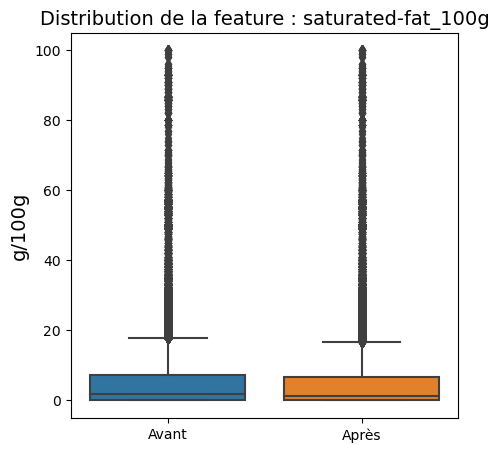

Calcul du coefficient de variation :
Avant traitement =  153.6711483955139
Après traitement =  164.20487156549015


count    240751.000000
mean          4.648034
std           7.632299
min           0.000000
25%           0.000000
50%           1.250000
75%           6.670000
max         100.000000
Name: saturated-fat_100g, dtype: float64

In [60]:
display(data["saturated-fat_100g"].describe())

data = fat_saturated_corr(data)

display(data["saturated-fat_100g"].describe())

Après remplissage des valeurs manquantes, il reste 10000 valeurs manquantes.

Les modifications effectuées modifient la distribution des valeurs.

Le coeffivient de variation le confirme, avec son augmentation après modification.

Les valeurs ajoutées n'ont donc pas la même distribution que celle qui étaient présentes. 

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


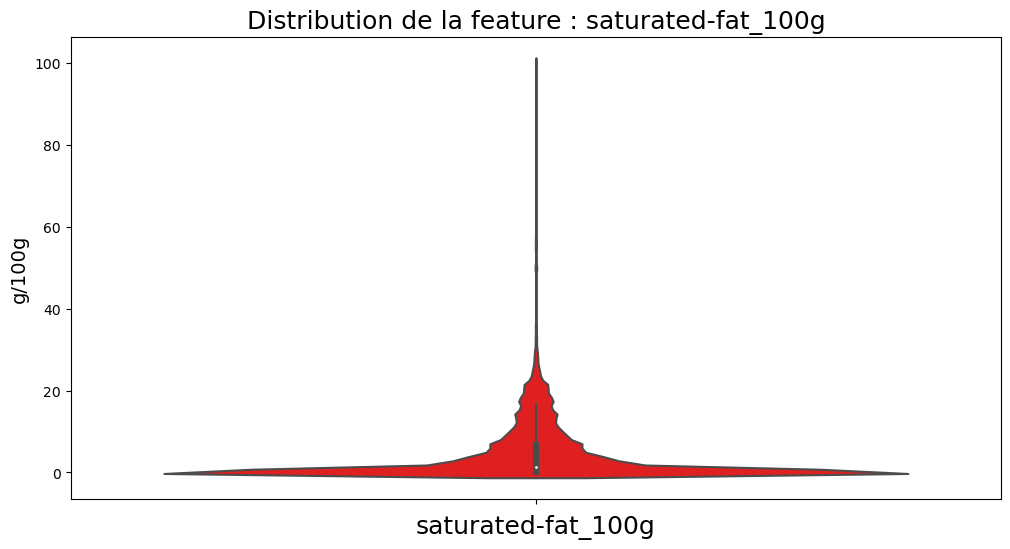

In [61]:
figure_feature(data, "saturated-fat_100g")

Similaire à ce qui est retrouvé avec la feature fat

#### <a name = "T3C6">6. Correction des la feature carbohydrates</a>

Le carbohydrate_100g est une feature majeure.

On recherche les valeurs pour lesquelles la somme des carbohydrates ("sugars_100g", "starch_100g", "fiber_100g") est supérieure à la valeur de 'carbohydrates_100g, ce qui correspond à une valeur aberrante.

In [62]:
def carbohydrate_corr(df):
    # Recherche des conditions où la somme des carbohydrates est plus grande que le total
    carbohydrates = ["sugars_100g", "starch_100g", "fiber_100g"]

    # On récupère les index qui remplissent cette condition
    index_sum_carbo = df.loc[df[carbohydrates].sum(axis = 1) > df["carbohydrates_100g"]].index

    # On récupère les index où il n'y a pas de valeur entrées pour les carbohydrates
    index_nulle_carbo = df.loc[df["carbohydrates_100g"].isnull()].index

    mask = copy.deepcopy(df)

    # On change la valeur par la somme
    df.loc[df.index.isin(index_sum_carbo), "carbohydrates_100g"] = df[carbohydrates].sum(axis = 1)
    df.loc[(df.index.isin(index_nulle_carbo)) & (df[carbohydrates].sum(axis = 1) > 0), "carbohydrates_100g"] = df[carbohydrates].sum(axis = 1)

    print("Il y a ", index_sum_carbo.shape[0], "valeurs incorrectes et",index_nulle_carbo.shape[0],"valeurs nulles.")
    print("Après correction, il y a", df.loc[(df["carbohydrates_100g"] > 100) & (df["carbohydrates_100g"] <= 110)].shape[0],"valeurs de carbohydrates entre 100 et 110 après correction")
    print("Après correction, il y a", df.loc[df["carbohydrates_100g"] > 110].shape[0], "valeurs de carbohydrates au dessus de 110 après correction")
    print("Après correction, il reste", df[df["carbohydrates_100g"].isnull()].shape[0],"valeurs de carbohydrates nulles")
    
    df = ajustement(df, "carbohydrates_100g")
    
    # Test statistique
    # Sur valeurs modifiées non nulle
    resultcorrection_ttest(mask, df, "carbohydrates_100g", False)
    
    return df

count    229486.000000
mean         32.373699
std          28.964316
min           0.000000
25%           6.350000
50%          21.430000
75%          58.700000
max         100.000000
Name: carbohydrates_100g, dtype: float64

Il y a  15080 valeurs incorrectes et 21962 valeurs nulles.
Après correction, il y a 15 valeurs de carbohydrates entre 100 et 110 après correction
Après correction, il y a 13 valeurs de carbohydrates au dessus de 110 après correction
Après correction, il reste 5371 valeurs de carbohydrates nulles
13 lignes supprimées
carbohydrates_100g : la modification change drastiquement les données, p_value: 4.724823820610983e-22


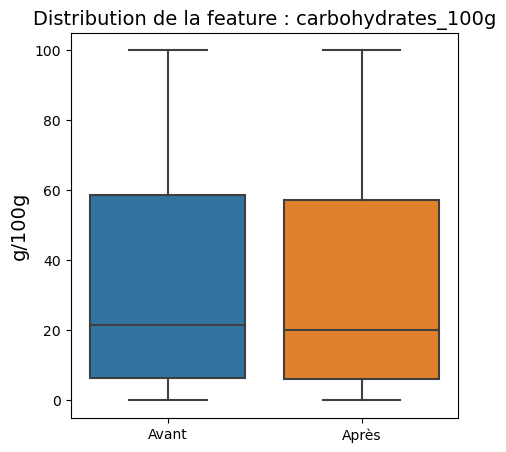

Calcul du coefficient de variation :
Avant traitement =  89.46866168072297
Après traitement =  91.02750381551633


count    246064.000000
mean         31.565538
std          28.733321
min           0.000000
25%           6.000000
50%          20.000000
75%          57.140000
max         100.000000
Name: carbohydrates_100g, dtype: float64

In [63]:
display(data["carbohydrates_100g"].describe())

data = carbohydrate_corr(data)

display(data["carbohydrates_100g"].describe())

On observe qu'il y avait un certain nombre de valeurs aberrantes (somme des carbo > valeur carbo).

Après correction, on observe des valeurs supérieures à 100. Cela pourrait provenir de valeurs mal corrigées précédemment. Ces lignes sont écartées.

On oberve que les modifications réalisées entraînent une modification significative de la distribution des valeurs. Ce qui est normal car pour 15080 valeurs, la quantité de carbohydrates est remesuré positivement.

Quand on analyse la distribution par boxplot avant et après, la médiane diminue très peu.

Donc la modification réalisée ne change pas dratiquement les valeurs.

Le coefficient de variation montre que les valeurs se sont rapprochées de la moyenne.

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


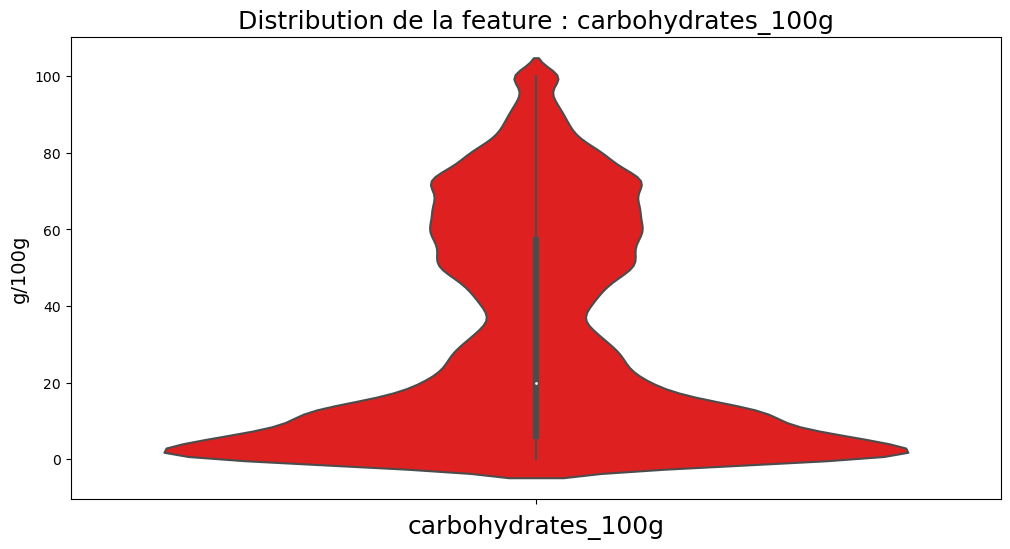

In [64]:
figure_feature(data, "carbohydrates_100g")

Deux types de produits : 
soient riches, soit pauvres en carbohydrates.

#### <a name = "T3C7">7. Correction des features Salt/Sodium</a>

Le salt_100g est une feature majeure.

In [65]:
# Calcul de la correlation entre Salt et Sodium
data["salt_100g"].corr(data["sodium_100g"])

0.9999999762923238

Forte corrélation, ce qui est attendu.

In [66]:
data[["sodium_100g", "salt_100g"]].describe()

,sodium_100g,salt_100g
count,241551.000000,241591.000000
mean,0.627719,1.594149
std,2.512957,6.382494
min,0.000000,0.000000
25%,0.027000,0.068580
50%,0.232000,0.589280
75%,0.536000,1.361440
max,100.000000,254.000000


On retrouve des valeurs > 100

100g de sel de table (salt) = ~39,33 - 39,37 g de sodium.

Voyons voir si nous retrouvons cette valeur.

In [67]:
data["sodium_100g"].mean()/data["salt_100g"].mean() * 100

39.37643718850233

On est très proche de la valeur.
Dans tous les cas le sodium ne peut pa être supérieur à 39,37 g.

Corrigeons dans un premier temps le sel.

In [68]:
with pd.option_context('display.max_columns', None):
    display(data[data["salt_100g"] > 100])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
408,2124810206,http://world-fr.openfoodfacts.org/produit/0002...,usda-ndb-import,1489090470,2017-03-09T20:14:30Z,1489090470,2017-03-09T20:14:30Z,Mediterranean Sea Salt,NaN,NaN,NaN,NaN,Olde Thompson,olde-thompson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,Etats-Unis,Mediterranean sea salt.,NaN,NaN,NaN,NaN,1.2 g (0.25 tsp),0.0,[ mediterranean-sea-salt -> en:mediterranean-...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,105.83418,41.667000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3037,11110825261,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489064104,2017-03-09T12:55:04Z,1489064104,2017-03-09T12:55:04Z,Coarse Kosher Salt,NaN,NaN,NaN,NaN,Kroger,kroger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,Etats-Unis,"Salt, yellow prussiate of soda (anti-caking ag...",NaN,NaN,NaN,NaN,1.2 g (0.25 tsp),1.0,[ salt -> en:salt ] [ yellow-prussiate-of-s...,en:e535,E535 - Ferrocyanure de sodium,0.0,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Na

On retrouve des sels dans les valeurs > 100.

Ils se caractérisent par une absence d'énergie. 

On va pouvoir les corriger ainsi.

Le sodium sera recalculé via le sel.

In [69]:
def salt_sodium_corr(df):
    
    # Quand c'est du sel.
    salt_condition = (df["salt_100g"] > 100) & ((df["energy_100g"] == 0) | df["energy_100g"].isnull())

    mask = copy.deepcopy(df)
    
    # On met à 100g
    df.loc[salt_condition, "salt_100g"] = 100
    
    # Quand c'est supérieur à 100
    minimum = df.loc[df["salt_100g"] > 0, "salt_100g"].min()
    condition = (df["salt_100g"] > 100) & (df["salt_100g"]/1000 > minimum)
    df.loc[condition, "salt_100g"] = df.loc[condition, "salt_100g"]/1000
    
    # On recalcul le sodium avec le ratio
    ratio_moyenne = df["sodium_100g"].mean()/df["salt_100g"].mean()

    df["sodium_100g"] = df["salt_100g"] * ratio_moyenne
    
    # Test statistique
    resultcorrection_ttest(mask, df, "sodium_100g", False)
    
    # Test statistique
    resultcorrection_ttest(mask, df, "salt_100g", False)
    
    df = ajustement(df, "salt_100g")
    
    # On récupère les index où il n'y a pas de valeur entrées pour les salt
    index_nulle_salt = df.loc[df["salt_100g"].isnull()].index
    
    print("Il y a %d valeurs nulles." %index_nulle_salt.shape[0])
 
    
    return df

In [70]:
display(data[["salt_100g", "sodium_100g"]].describe())

data = salt_sodium_corr(data)

display(data[["salt_100g", "sodium_100g"]].describe())

,salt_100g,sodium_100g
count,241591.000000,241551.000000
mean,1.594149,0.627719
std,6.382494,2.512957
min,0.000000,0.000000
25%,0.068580,0.027000
50%,0.589280,0.232000
75%,1.361440,0.536000
max,254.000000,100.000000


Il y a 9844 valeurs nulles.


,salt_100g,sodium_100g
count,241591.000000,241591.000000
mean,1.581431,0.627719
std,6.192190,2.457871
min,0.000000,0.000000
25%,0.068580,0.027222
50%,0.589280,0.233903
75%,1.361440,0.540398
max,100.000000,39.693088


On a pu corriger les valeurs aberrantes.

Il reste des valeurs nulles, que nous tenterons de compléter par la suite.

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


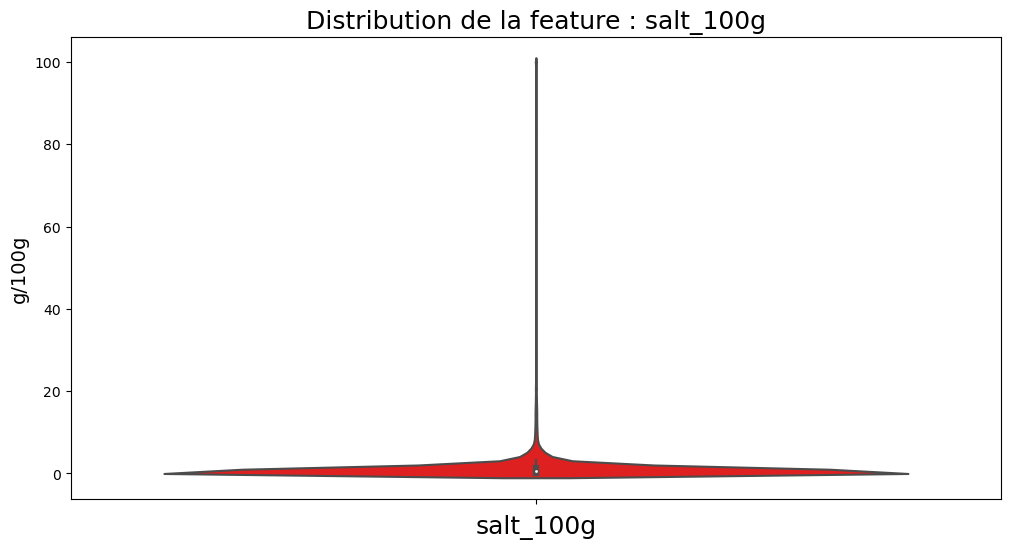

In [71]:
figure_feature(data, "salt_100g")

La majorité des produits sont pauvres en sel.

#### <a name = "T3C8">8. Valeurs extrêmes : somme des macro-éléments</a>

Si on fait la somme des macro-éléments, il n'est pas possible que cette valeur soit supérieure à 100g

On va donc rechercher les produits où on retrouve ces aberrations.

In [72]:
#Liste contenant les noms des macro-éléments
macro = [ 
'fat_100g',
 'carbohydrates_100g',
 'proteins_100g',
 'salt_100g',
]


In [73]:
# On recherche les features où il y a des valeurs aberrantes et on garde les indexes en mémoire
# On s'intéresse aux macro nutriments, car importants pour les calculs de nutriscore

somme_pos = []
# On analyse l'erreur entre la somme des macros entre 100 et 110
for i in range(101,111):
    somme_pos.append([i, data[data[macro].sum(axis = 1) > i].shape[0]])
       
# On transforme en DataFrame    
somme_pos = pd.DataFrame(somme_pos, columns = ["Somme", "Nombre"])
display(somme_pos)

,Somme,Nombre
0,101,2682
1,102,2092
2,103,1750
3,104,1480
4,105,1285
5,106,1151
6,107,1046
7,108,938
8,109,848
9,110,786


Si on accepte 0 % erreurs, 4000 lignes sont éliminées.

Si on accepte 10 % d'erreurs, 7 fois moins de lignes sont éliminées.

L'erreur étant minimime. On accepte 10 % d'erreur.

In [74]:
def sommeplus (df):
    macro = ['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g']
    # On recherche les produits où la somme des valeurs macros est > 110
    
    mask = copy.deepcopy(df)
    
    index_macro = df[df[macro].sum(axis = 1) > 110].index

    df = df[~df.index.isin(index_macro)]

    print(index_macro.shape[0], "lignes sont éliminées")
    
    # Test statistique
    for element in macro:
        resultcorrection_ttest(mask, df, element, False)
    
    return df

In [75]:
data = sommeplus(data)

786 lignes sont éliminées


786 lignes ont été supprimées à la suite de cette opération.

Ces élimination n'entraînent pas de modification significative de la distribution.

In [76]:
df = pd.DataFrame(data[macro].sum(axis = 1), columns = ["Sum"])
df.describe()

,Sum
count,250649.000000
mean,51.098056
std,33.740980
min,0.000000
25%,18.960860
50%,47.700000
75%,86.965200
max,110.000000


C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


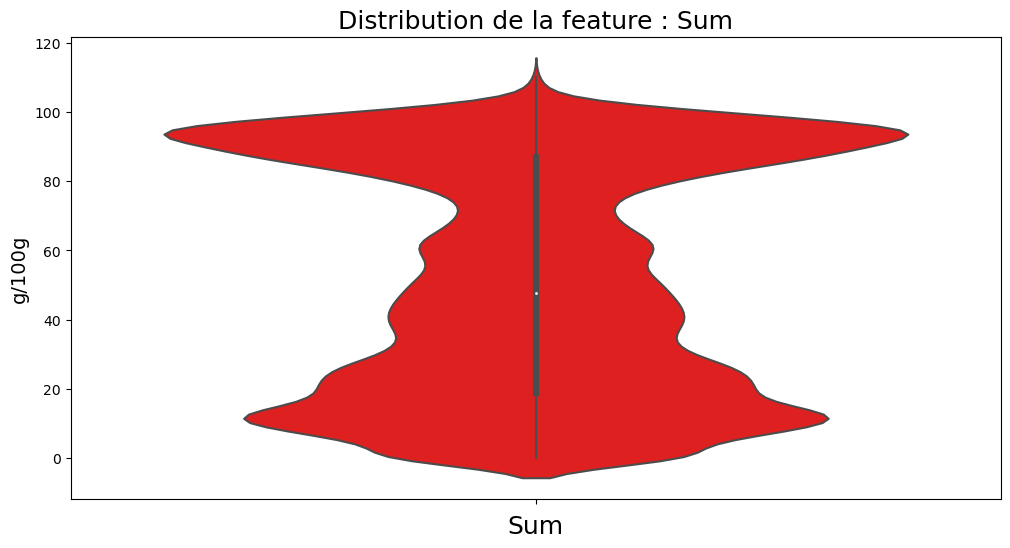

In [77]:
figure_feature(df, "Sum")

Il y a 3 types de produits.
- Pauvres en macro nutriment < 30g/100g
- Intermédiaires en macro nutriments > 30 et < 80 g/100g
- Très riches en macro nutriments > 80 g/100g

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


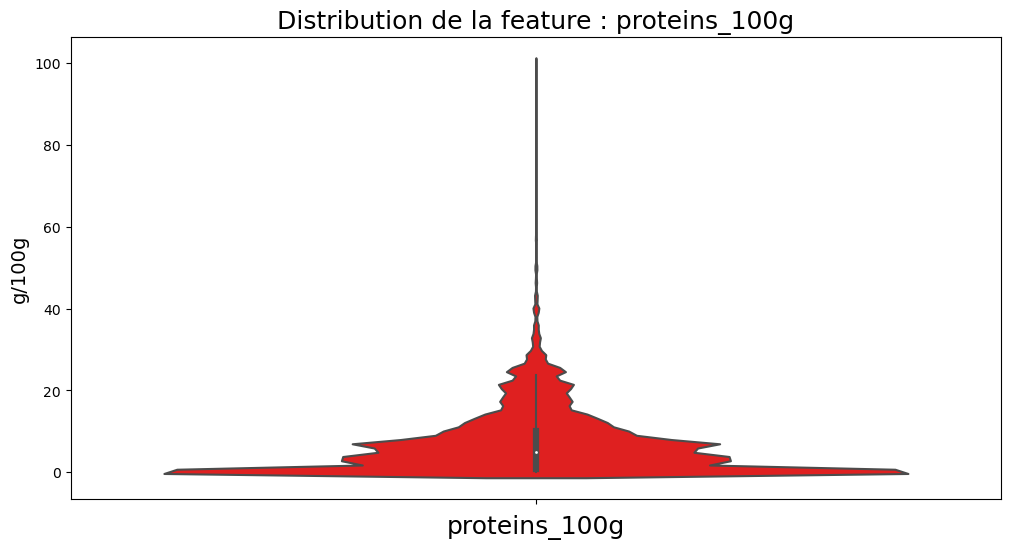

In [78]:
# Affichons les proteins
figure_feature(data, "proteins_100g")

Il semblerait que ce soit les carbohydrates qui contribuent le plus au haut de la distribution

#### <a name = "T3C9">9. Correction et remplissage d'energy-from-fat_100g </a>

In [79]:
print("Nombre de valeurs manquantes :",data["energy-from-fat_100g"].isnull().sum())
display(data["energy-from-fat_100g"].describe())

Nombre de valeurs manquantes : 249813


count     836.000000
mean      565.361112
std       693.596901
min         0.000000
25%        45.850000
50%       296.000000
75%       888.500000
max      3830.000000
Name: energy-from-fat_100g, dtype: float64

La feature est très peu remplie, mais elle est facilement remplissable.

En effet, 1g de fat correspond à 37,7 kJ.

Si on mesure le ratio actuel.

In [80]:
data.loc[data["energy-from-fat_100g"].notnull(), "energy-from-fat_100g"].sum()/data.loc[data["energy-from-fat_100g"].notnull(), "fat_100g"].sum()


37.09314191640908

On est éloigné de la valeur théorique. Ce qui veut dire qu'il y a des erreurs d'entrées.

In [81]:
(data.loc[data["energy-from-fat_100g"].notnull(), "energy-from-fat_100g"]/data.loc[data["energy-from-fat_100g"].notnull(), "fat_100g"]).describe()


count    674.000000
mean            inf
std             NaN
min        0.000000
25%       35.914889
50%       37.493017
75%       41.899265
max             inf
dtype: float64

On va recalculer pour tout les produits.

In [82]:
## Fonction permettant de mesurer energy-from-fat_100g

def energy_fat(df):

    null_avant = df[df["energy-from-fat_100g"].isnull()].index
    
    mask = copy.deepcopy(df)
    
    #On fait la quantité de fat * 37,7 joules
    df["energy-from-fat_100g"] = df["fat_100g"] * 37.7
    
    null_apres = df[df["energy-from-fat_100g"].isnull()].index

    # Test statistique
    resultcorrection_ttest(mask[~mask.index.isin(null_avant)], df[~df.index.isin(null_avant)], "energy-from-fat_100g", False)

    print(null_avant.shape[0] - null_apres.shape[0],"données ont pu être rempli. Il en reste",null_apres.shape[0]," incomplètes")
    
    return df

In [83]:
data = energy_fat(data)

display(data["energy-from-fat_100g"].describe())

243531 données ont pu être rempli. Il en reste 6282  incomplètes


count    244367.000000
mean        460.057299
std         625.921737
min           0.000000
25%           3.770000
50%         188.500000
75%         736.846500
max        3770.000000
Name: energy-from-fat_100g, dtype: float64

In [84]:
data["fat_100g"].corr(data["energy-from-fat_100g"])

0.9999999999999983

Ce résultat est normal étant donné que nous avons mesuré l'énergy via la quantité de fat

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


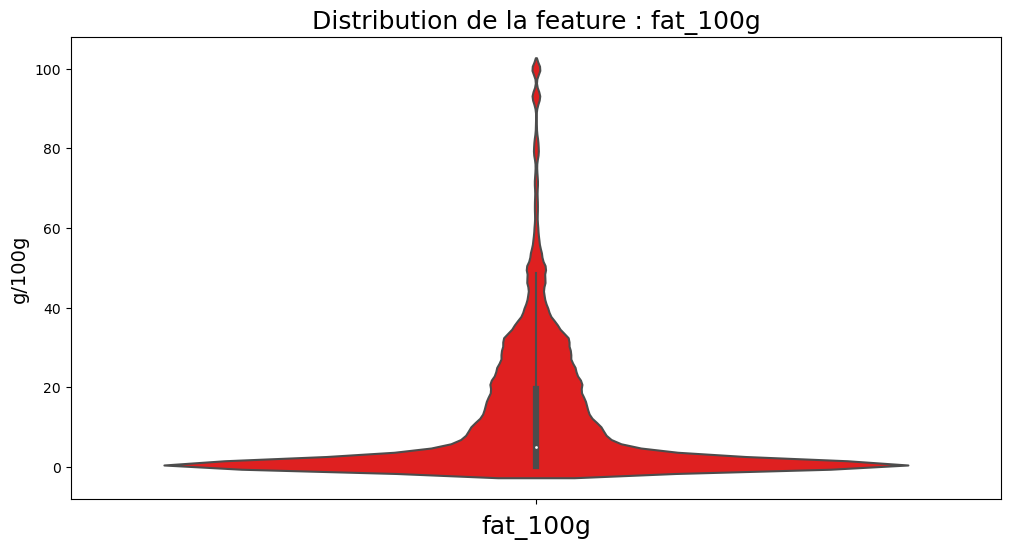

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


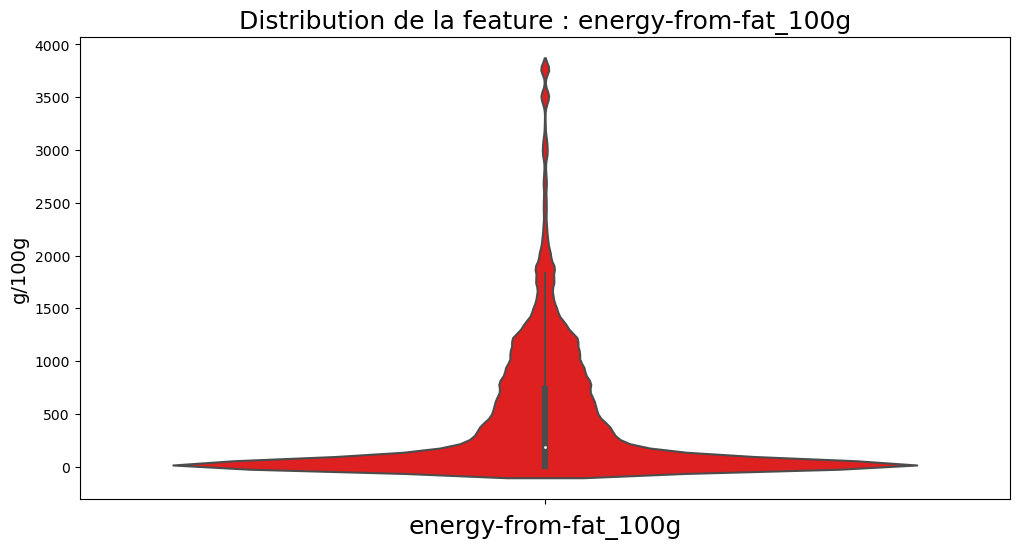

In [85]:
# on peut le confirmer visuellement.

figure_feature(data, "fat_100g")
figure_feature(data, "energy-from-fat_100g")

#### <a name = "T3C10">10. Correction et remplissage d'energy_100g </a>

In [86]:
print("Nombre de valeurs manquantes :",data["energy_100g"].isnull().sum())
display(data["energy_100g"].describe())

Nombre de valeurs manquantes : 4400


count    2.462490e+05
mean     1.142746e+03
std      6.630745e+03
min      0.000000e+00
25%      3.890000e+02
50%      1.100000e+03
75%      1.674000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

Il y a très peu de valeurs manquantes. Cependant, on peut observer des valeurs à 0.

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


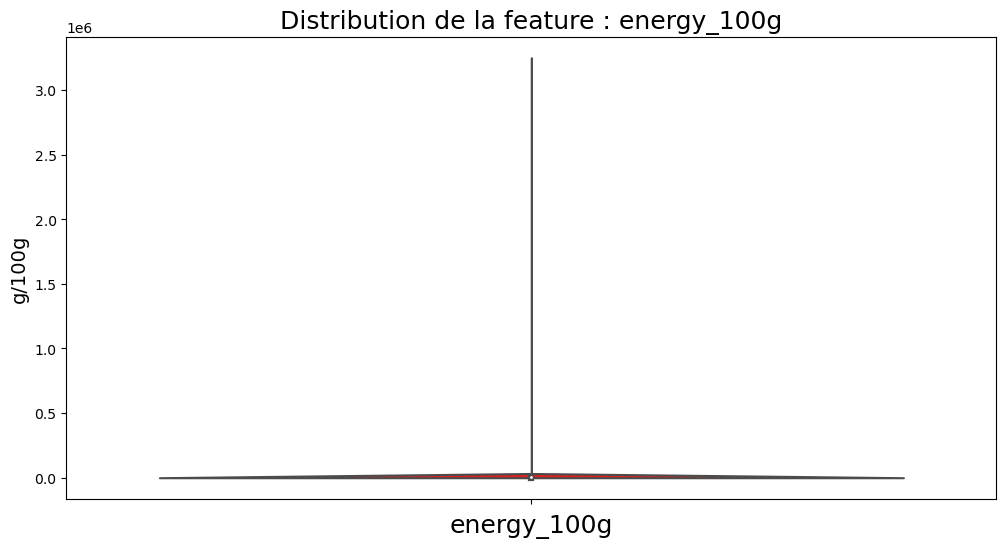

In [87]:
figure_feature(data, "energy_100g")

On peut re-calculer les valeurs manquantes ou aberrantes pour la feature "energy_100g".

**Pour 1 g de protéine ou de carbohydrate on obtient 16.7 kJ d'énergie et pour 1 g de fat, on obtient 37.7 kJ d'énergie**

In [88]:
## Fonction pour calculer l'énergie
def energy_calcul(df):

    energy = ['fat_100g', 'carbohydrates_100g', 'proteins_100g']

    cond1 = (df["energy_100g"].isnull()) # Si la valeur est nulle
    cond2 = (df["energy_100g"] < df["energy-from-fat_100g"]) # si la valeur est aberrante
    cond3 = (df["energy_100g"] > 3770) # Quand valeur supérieure au maximum théoorique
    cond4 = (df["energy_100g"] == 0) # Quand valeur = 0, on recalcul
    cond_final = (df[energy].sum(axis = 1) > 0) # Si la valeur est mesurable

    mask = copy.deepcopy(df)
    
    print("Nombre de valeurs aberrantes ", df[(cond1|cond2|cond3|cond4)].shape[0])
    print("null : ", df[cond1].shape[0],
         "<Nfat : ", df[cond2].shape[0],
         ">3770 : ", df[cond3].shape[0],
         "==0 : ", df[cond4].shape[0],
         "\n")
    print("Nombre de valeurs qui seront corrigées ", df[(cond1|cond2|cond3|cond4) & cond_final].shape[0])
    print("null : ", df[cond1 & cond_final].shape[0],
         "<Nfat : ", df[cond2 & cond_final].shape[0],
         ">3770 : ", df[cond3 & cond_final].shape[0],
         "==0 : ", df[cond4 & cond_final].shape[0],
         "\n")
    print("Nombre de valeurs qui resteront non-corrigées ", df[(cond1|cond2|cond3|cond4) & ~cond_final].shape[0])
    print("null : ", df[cond1 & ~cond_final].shape[0],
         "<Nfat : ", df[cond2 & ~cond_final].shape[0],
         ">3770 : ", df[cond3 & ~cond_final].shape[0],
         "==0 : ", df[cond4 & ~cond_final].shape[0],
         "\n")
    
    df.loc[(cond1|cond2|cond3|cond4) & cond_final, "energy_100g"] =( 
[(x[0]*37.7 if x[0] > 0 else 0) 
 + (x[1]*16.7 if x[1] > 0 else 0) 
 + (x[2]*16.7 if x[2] > 0 else 0) 
 for x in np.array(df.loc[(cond1|cond2|cond3|cond4) & cond_final, ['fat_100g',  'carbohydrates_100g', 'proteins_100g']])])
    
    # Test statistique
    resultcorrection_ttest(mask, df, "energy_100g", False)
    
    print("Nombre de valeurs nulles restantes ", df[cond1].shape[0])
    
    return df

In [89]:
data = energy_calcul(data)

Nombre de valeurs aberrantes  15877
null :  4400 <Nfat :  3828 >3770 :  306 ==0 :  7393 

Nombre de valeurs qui seront corrigées  6390
null :  1105 <Nfat :  3828 >3770 :  294 ==0 :  1213 

Nombre de valeurs qui resteront non-corrigées  9487
null :  3295 <Nfat :  0 >3770 :  12 ==0 :  6180 

Nombre de valeurs nulles restantes  4400


C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


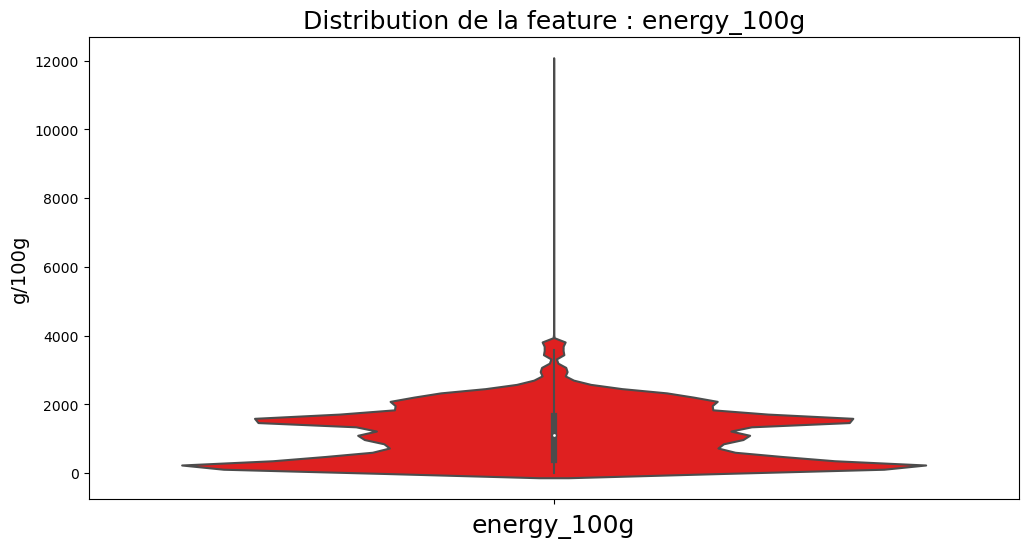

count    247354.000000
mean       1130.457918
std         786.827284
min           0.000000
25%         393.000000
50%        1109.000000
75%        1674.000000
max       11954.000000
Name: energy_100g, dtype: float64

In [90]:
figure_feature(data, "energy_100g")
display(data["energy_100g"].describe())

In [91]:
with pd.option_context('display.max_columns', None):
    display(data[data["energy_100g"]>4000][['energy_100g','fat_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g']])
    display(data[data["energy_100g"]>4000])

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,salt_100g
4874,5690.0,0.0,0.0,0.0,3.30200
25157,6975.0,0.0,0.0,0.0,0.00000
71049,11954.0,0.0,0.0,0.0,39.91356
81474,4184.0,0.0,0.0,0.0,0.00000
83268,5577.0,0.0,0.0,0.0,0.00000
83269,5577.0,0.0,0.0,0.0,0.00000
100931,6975.0,0.0,0.0,0.0,0.00000
106652,4184.0,0.0,0.0,0.0,30.48000
107990,4184.0,0.0,0.0,0.0,0.00000
116211,6276.0,0.0,0.0,0.0,0.00000


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
4874,11150090834,http://world-fr.openfoodfacts.org/produit/0011...,usda-ndb-import,1489055247,2017-03-09T10:27:27Z,1489055247,2017-03-09T10:27:27Z,Traditional Dusseldorf Mustard,NaN,NaN,NaN,NaN,Roundy's,roundy-s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,Etats-Unis,"Vinegar, water, mustard seed, salt, red pepper.",NaN,NaN,NaN,NaN,5 g (1 tsp),0.0,[ vinegar -> en:vinegar ] [ water -> en:wat...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,5690.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3.30200,1.310666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25157,32251079443,http://world-fr.openfoodfacts.org/produit/0032...,usda-ndb-import,1489134186,2017-03-10T08:23:06Z,1489134186,2017-03-10T08:23:06Z,100% Natural Non-Stick Canola Cooking Spray Oil,NaN,NaN,NaN,NaN,Family Gourmet,family-gourmet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,Etats-Unis,"Canola oil, lecithin from soybeans, rosemary e...",NaN,NaN,NaN,NaN,0.3 g (0.25 SEC. SPRAY),0.0,[ canola-oil -> en:canola-oil ] [ oil -> en...,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,6975.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN

Ce sont soient des huiles, soit du sel.

Il n'y a pas d'informations nutritionnelles

Etant donné que ça concerne peu de produits, on les enlève.

In [92]:
data = data[data["energy_100g"]<4000]

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


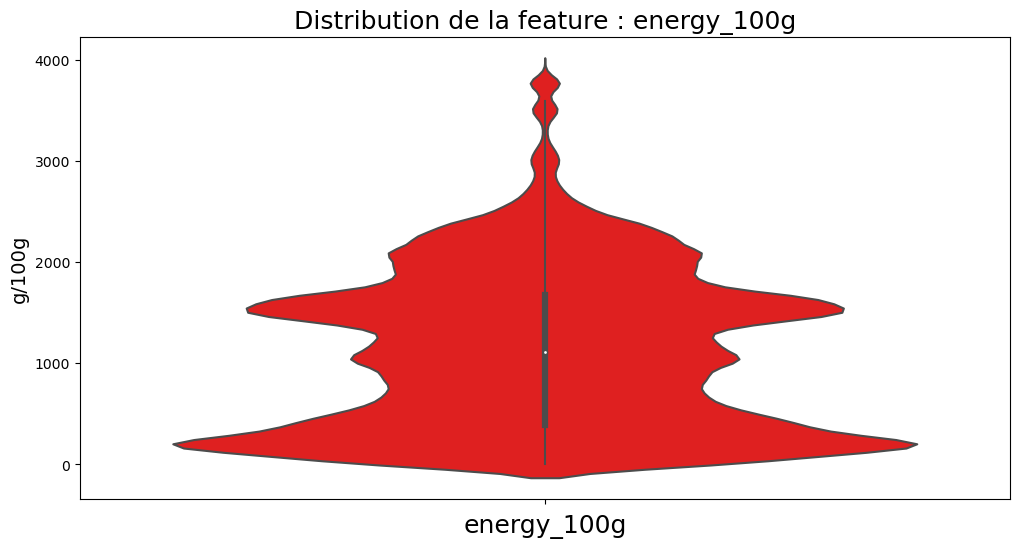

count    247342.000000
mean       1130.224349
std         785.999757
min           0.000000
25%         393.000000
50%        1109.000000
75%        1674.000000
max        3889.238000
Name: energy_100g, dtype: float64

In [93]:
figure_feature(data, "energy_100g")
display(data["energy_100g"].describe())

Très peu de produits riches en énergie.

#### <a name = "T3C11">11. Différence entre energy_100g mesurée et entrée </a>

En connaissant la quantité de Fat, Proteins et Sugars, on est sensé pouvoir trouver la valeur d'energy_100g.

En la remesurant, on fait donc l'hypothèse que la différence entre théorique et entrée soit faible.

Pour comparer, nous faisons sur les valeurs entrées > 0 et où on retrouve une valeur pour les 3 macros.

In [94]:
macro_nrj = ['fat_100g', 'carbohydrates_100g', 'proteins_100g']
cond1 = (data[macro_nrj].count(axis = 1) == 3) # 3 valeurs non nulles
cond2 = (data["energy_100g"].notnull()) # valeur energy non nulle

data[cond1 & cond2].shape[0]

241645

In [95]:
# On prend un slice du dataframe
dt = copy.deepcopy(data[cond1 & cond2])

dt["energy_100g"] =( 
[(x[0]*37.7 if x[0] > 0 else 0) 
 + (x[1]*16.7 if x[1] > 0 else 0) 
 + (x[2]*16.7 if x[2] > 0 else 0) 
 for x in np.array(dt[macro_nrj])])
    

count    247342.000000
mean       1130.224349
std         785.999757
min           0.000000
25%         393.000000
50%        1109.000000
75%        1674.000000
max        3889.238000
Name: energy_100g, dtype: float64

count    241645.000000
mean       1102.381055
std         790.199414
min           0.000000
25%         360.490000
50%        1062.099000
75%        1666.989000
max        3889.238000
Name: energy_100g, dtype: float64

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


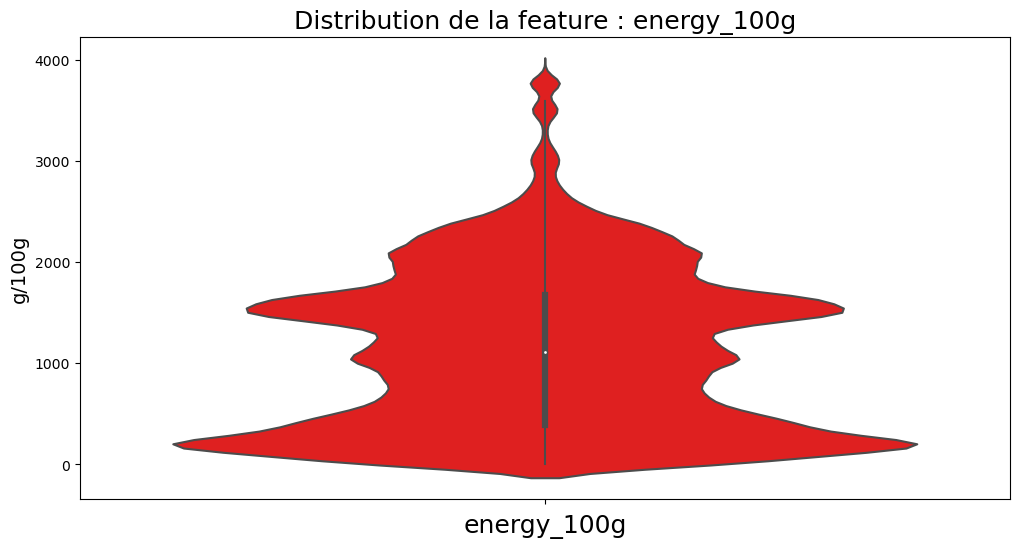

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


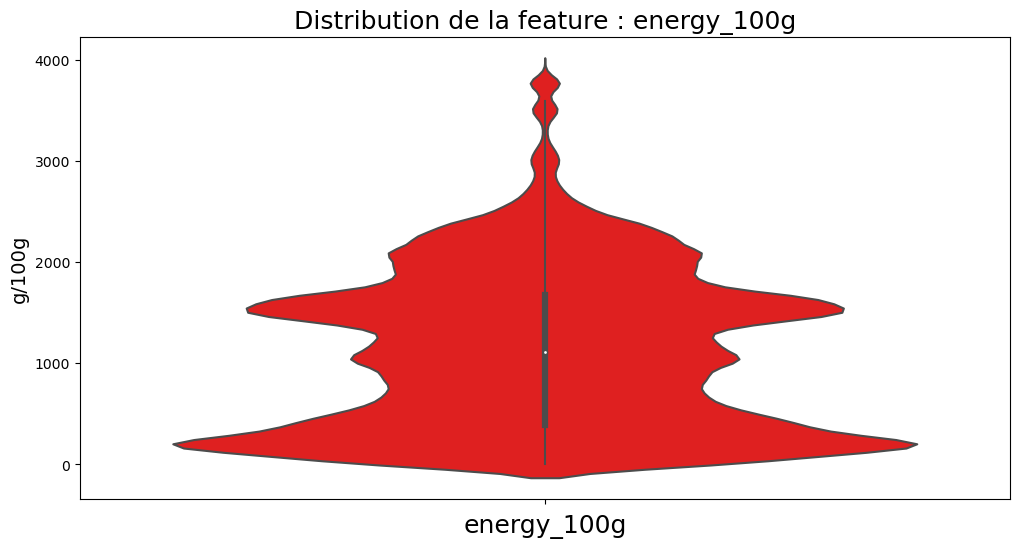

In [96]:
display(data["energy_100g"].describe())
display(dt["energy_100g"].describe())
figure_feature(data, "energy_100g")
figure_feature(data, "energy_100g")

In [97]:
#On mesure la différence entre la valeur de la base de données et la valeur calculée
dif = pd.DataFrame({"variation" : data[cond1 & cond2]["energy_100g"] - dt["energy_100g"]})

display(dif.describe())

,variation
count,241645.000000
mean,32.667095
std,228.458093
min,-1655.810000
25%,-17.536000
50%,1.803000
75%,27.240000
max,3556.000000


On affiche la dispersion de la différence.

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


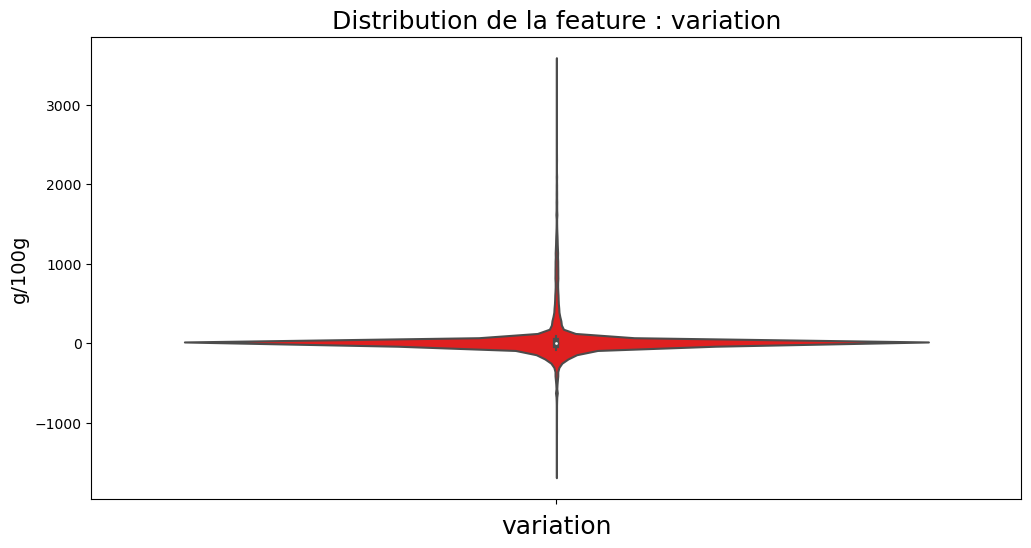

In [98]:
figure_feature(dif, "variation")

L'alcool pourrait contribuer à sous-estimer l'énergie.

1 g d'alcool équivaut à 29.3kJ.


In [99]:
data.loc[(data["alcohol_100g"].notnull()) & (data["alcohol_100g"]>0), ['energy_100g','fat_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g',"alcohol_100g"]]

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,salt_100g,alcohol_100g
98811,832.0,NaN,NaN,NaN,NaN,36.0
98812,856.0,NaN,NaN,NaN,NaN,37.5
98813,860.0,NaN,NaN,NaN,NaN,37.5
98921,169.0,NaN,2.94,0.361,NaN,5.0
99172,145.0,0.0,10.60,1.300,NaN,5.0
...,...,...,...,...,...,...
255235,276.0,NaN,NaN,7.000,NaN,7.0
255236,276.0,NaN,NaN,7.000,NaN,7.0
255745,2775.0,58.0,13.00,21.000,0.55,12.0
255746,2775.0,58.0,13.00,21.000,0.55,12.0


In [100]:
dt.loc[(dt["alcohol_100g"].notnull()) & (dt["alcohol_100g"]>0), ['energy_100g','fat_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g',"alcohol_100g"]]

,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,salt_100g,alcohol_100g
99172,198.7300,0.0,10.60,1.300,NaN,5.0
100207,68.7038,0.0,3.82,0.294,0.00,4.7
117617,27.8556,0.0,1.39,0.278,NaN,4.2
155501,165.3300,0.0,9.90,0.000,0.01,0.1
155732,165.3300,0.0,9.90,0.000,0.01,0.1
...,...,...,...,...,...,...
252574,80.1600,0.0,4.00,0.800,NaN,8.0
252575,80.1600,0.0,4.00,0.800,NaN,8.0
255745,2754.4000,58.0,13.00,21.000,0.55,12.0
255746,2754.4000,58.0,13.00,21.000,0.55,12.0


C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


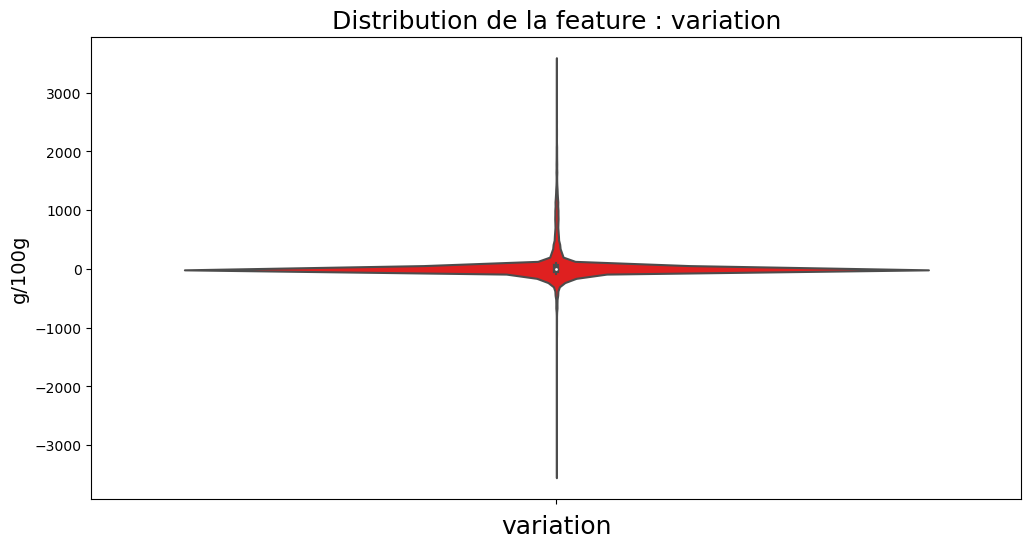

In [101]:
# On prend un slice du dataframe
dt_alcool = copy.deepcopy(data[cond1 & cond2])

dt_alcool["energy_100g"] =( 
[(x[0]*37.7 if x[0] > 0 else 0) 
 + (x[1]*16.7 if x[1] > 0 else 0) 
 + (x[2]*16.7 if x[2] > 0 else 0) 
 + (x[3]*29.3 if x[3] > 0 else 0) 
 for x in np.array(dt_alcool[macro_nrj + ["alcohol_100g"]])])
    
#On mesure la différence entre la valeur de la base de données et la valeur calculée
dif_alcool = pd.DataFrame({"variation" : data[cond1 & cond2]["energy_100g"] - dt_alcool["energy_100g"]})

figure_feature(dif_alcool, "variation")

In [102]:
dt_alcool.loc[(dt_alcool["alcohol_100g"].notnull()) & (dt_alcool["alcohol_100g"]>0), ['energy_100g','fat_100g', 'carbohydrates_100g', 'proteins_100g', 'salt_100g',"alcohol_100g"]]


,energy_100g,fat_100g,carbohydrates_100g,proteins_100g,salt_100g,alcohol_100g
99172,345.2300,0.0,10.60,1.300,NaN,5.0
100207,206.4138,0.0,3.82,0.294,0.00,4.7
117617,150.9156,0.0,1.39,0.278,NaN,4.2
155501,168.2600,0.0,9.90,0.000,0.01,0.1
155732,168.2600,0.0,9.90,0.000,0.01,0.1
...,...,...,...,...,...,...
252574,314.5600,0.0,4.00,0.800,NaN,8.0
252575,314.5600,0.0,4.00,0.800,NaN,8.0
255745,3106.0000,58.0,13.00,21.000,0.55,12.0
255746,3106.0000,58.0,13.00,21.000,0.55,12.0


In [103]:
display(data["energy_100g"].describe())
display(dt["energy_100g"].describe())
display(dt_alcool["energy_100g"].describe())
display(dif["variation"].describe())
display(dif_alcool["variation"].describe())

count    247342.000000
mean       1130.224349
std         785.999757
min           0.000000
25%         393.000000
50%        1109.000000
75%        1674.000000
max        3889.238000
Name: energy_100g, dtype: float64

count    241645.000000
mean       1102.381055
std         790.199414
min           0.000000
25%         360.490000
50%        1062.099000
75%        1666.989000
max        3889.238000
Name: energy_100g, dtype: float64

count    241645.000000
mean       1102.557402
std         790.135542
min           0.000000
25%         360.720000
50%        1062.240000
75%        1667.050000
max        4500.060000
Name: energy_100g, dtype: float64

count    241645.000000
mean         32.667095
std         228.458093
min       -1655.810000
25%         -17.536000
50%           1.803000
75%          27.240000
max        3556.000000
Name: variation, dtype: float64

count    241645.000000
mean         32.490749
std         228.444757
min       -3515.960000
25%         -17.619000
50%           1.778000
75%          27.140000
max        3556.000000
Name: variation, dtype: float64

In [104]:
data[cond1 & cond2]["energy_100g"]

0         2243.0
1         1941.0
2         2540.0
3         1552.0
4         1933.0
           ...  
255946     247.0
255947    1538.0
255948    1538.0
255949    2155.0
255950    2155.0
Name: energy_100g, Length: 241645, dtype: float64

In [105]:
dt["energy_100g"]

0         2210.351
1         1985.441
2         2750.702
3         1485.268
4         1973.343
            ...   
255946     294.755
255947    1628.490
255948    1628.490
255949     382.020
255950     382.020
Name: energy_100g, Length: 241645, dtype: float64

In [106]:
result_test1 = stats.ttest_rel(data.loc[cond1 & cond2,"energy_100g"], dt["energy_100g"], nan_policy = "omit")
display(result_test1)
result_test2 = stats.ttest_rel(dt["energy_100g"], dt_alcool["energy_100g"])
display(result_test2)
result_test1 = stats.ttest_rel(data.loc[cond1 & cond2,"energy_100g"], dt_alcool["energy_100g"], nan_policy = "omit")
display(result_test1)

Ttest_relResult(statistic=70.28989247168724, pvalue=0.0)

Ttest_relResult(statistic=-6.724993267608909, pvalue=1.759888045622314e-11)

Ttest_relResult(statistic=69.91452768533482, pvalue=0.0)

Ces résultats montrent que la différence entre l'energie théorique et mesurée est significative.

L'ajout de la l'alcool dans la mesure de l'energie est significatif par rapport à la valeur donnée et la valeur mesurée sans alcool.

Les valeurs médianes et interquartiles ne sont pas altérées.

Il y a juste des valeurs extrèmes qui devront être rectifiées.

On réactualise notre fonction.

In [107]:
## Fonction pour calculer l'énergie
## V2
def energy_calcul(df):

    energy = ['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'alcohol_100g']
    dt_mesure = [(x[0]*37.7 if x[0] > 0 else 0) 
 + (x[1]*16.7 if x[1] > 0 else 0) 
 + (x[2]*16.7 if x[2] > 0 else 0) 
 + (x[3]*29.3 if x[3] > 0 else 0) 
 for x in np.array(df[energy])]
    
    cond1 = (df["energy_100g"].isnull()) # Si la valeur est nulle
    cond2 = (df["energy_100g"] < df["energy-from-fat_100g"]) # si la valeur est aberrante
    cond3 = (df["energy_100g"] > 3770) # Quand valeur supérieure au maximum théoorique
    cond4 = (df["energy_100g"] == 0) # Quand valeur = 0, on recalcul
    cond5 = (abs(df["energy_100g"] - dt_mesure) > 500) # Quand difference > 500
    cond6 = (df[energy].count(axis = 1) >= 3) # quand on a au moins 3 mesures
    cond_final = (df[energy].sum(axis = 1) > 0) # Si la valeur est mesurable

 
    mask = copy.deepcopy(df)
    
    print("Nombre de valeurs aberrantes ", df[(cond1|cond2|cond3|cond4|cond5)].shape[0])
    print("null : ", df[cond1].shape[0],
         "<Nfat : ", df[cond2].shape[0],
         ">3770 : ", df[cond3].shape[0],
         "==0 : ", df[cond4].shape[0],
         "diff > 500 : ", df[cond5].shape[0],
         "\n")
    print("Nombre de valeurs qui seront corrigées ", df[(cond1|cond2|cond3|cond4|(cond5 & cond6)) & cond_final].shape[0])
    print("null : ", df[cond1 & cond_final].shape[0],
         "<Nfat : ", df[cond2 & cond_final].shape[0],
         ">3770 : ", df[cond3 & cond_final].shape[0],
         "==0 : ", df[cond4 & cond_final].shape[0],
         "diff > 500 : ", df[(cond5 & cond6) & cond_final].shape[0],
         "\n")
    print("Nombre de valeurs qui resteront non-corrigées ", df[(cond1|cond2|cond3|cond4|(cond5 & cond6)) & ~cond_final].shape[0])
    print("null : ", df[cond1 & ~cond_final].shape[0],
         "<Nfat : ", df[cond2 & ~cond_final].shape[0],
         ">3770 : ", df[cond3 & ~cond_final].shape[0],
         "==0 : ", df[cond4 & ~cond_final].shape[0],
         "diff > 500 : ", df[(cond5 & cond6) & ~cond_final].shape[0],
         "\n")
    
    df.loc[(cond1|cond2|cond3|cond4|(cond5 & cond6)) & cond_final, "energy_100g"] =( 
[(x[0]*37.7 if x[0] > 0 else 0) 
 + (x[1]*16.7 if x[1] > 0 else 0) 
 + (x[2]*16.7 if x[2] > 0 else 0) 
 + (x[3]*29.3 if x[3] > 0 else 0) 
 for x in np.array(df.loc[(cond1|cond2|cond3|cond4|(cond5 & cond6)) & cond_final, energy])])
    
    df.loc[df["energy_100g"] >3770, "energy_100g"] = 3770 
    # Test statistique
    resultcorrection_ttest(mask, df, "energy_100g", False)
    
    print("Nombre de valeurs nulles restantes ", df[cond1].shape[0])
    
    return df

Nombre de valeurs aberrantes  16759
null :  0 <Nfat :  0 >3770 :  956 ==0 :  6180 diff > 500 :  9623 

Nombre de valeurs qui seront corrigées  9384
null :  0 <Nfat :  0 >3770 :  956 ==0 :  2 diff > 500 :  8426 

Nombre de valeurs qui resteront non-corrigées  6585
null :  0 <Nfat :  0 >3770 :  0 ==0 :  6178 diff > 500 :  407 

energy_100g : la modification change drastiquement les données, p_value: 1.569375258208576e-36


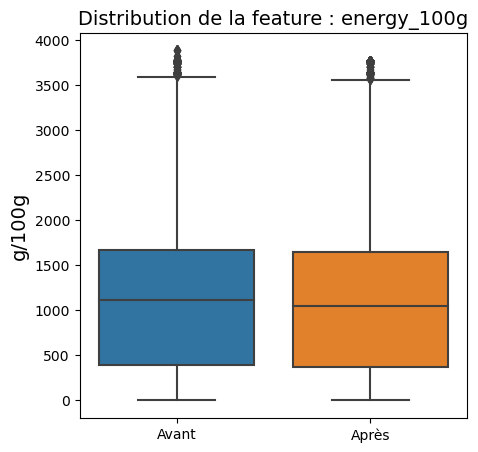

Calcul du coefficient de variation :
Avant traitement =  69.54369348340933
Après traitement =  70.82129395613997
Nombre de valeurs nulles restantes  0


In [108]:
data = energy_calcul(data)

C:\Users\33664\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


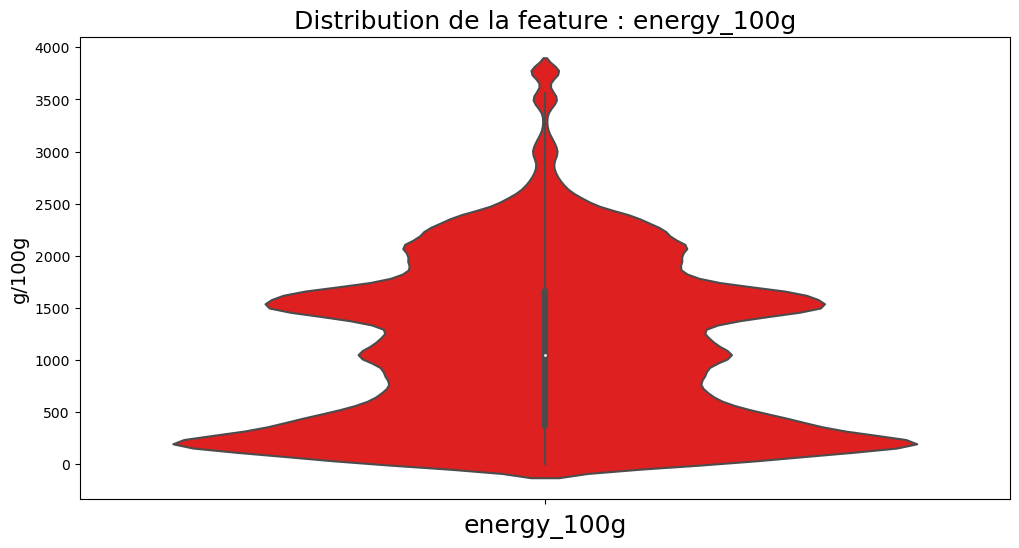

In [109]:
figure_feature(data, "energy_100g")

La distribution de l'energy est toujours similaire, mais comme le test le montre, la modification est significative, c'est en accord avec les résultats précédents.

Nous n'avons plus de valeurs nulles pour l'énergie.

In [110]:
# Fonction permettant de créer le fichier csv

def creation_fichier_csv(df,nom_du_fichier):
    
    ## On identifie si le format CSV a été entré, sinon on l'ajout
    if ".csv" not in nom_du_fichier:
        nom_du_fichier = nom_du_fichier + ".csv"
        
    ## Le fichier est écrit au même endroit que le notebook
    ## Séparateur : tab
    df.to_csv(nom_du_fichier, index = False, sep = "\t")


Nous avons donc des données nettoyées, qu'on peut exporter et ensuite analyser.

In [111]:
creation_fichier_csv(data, "donnees_nettoyees")

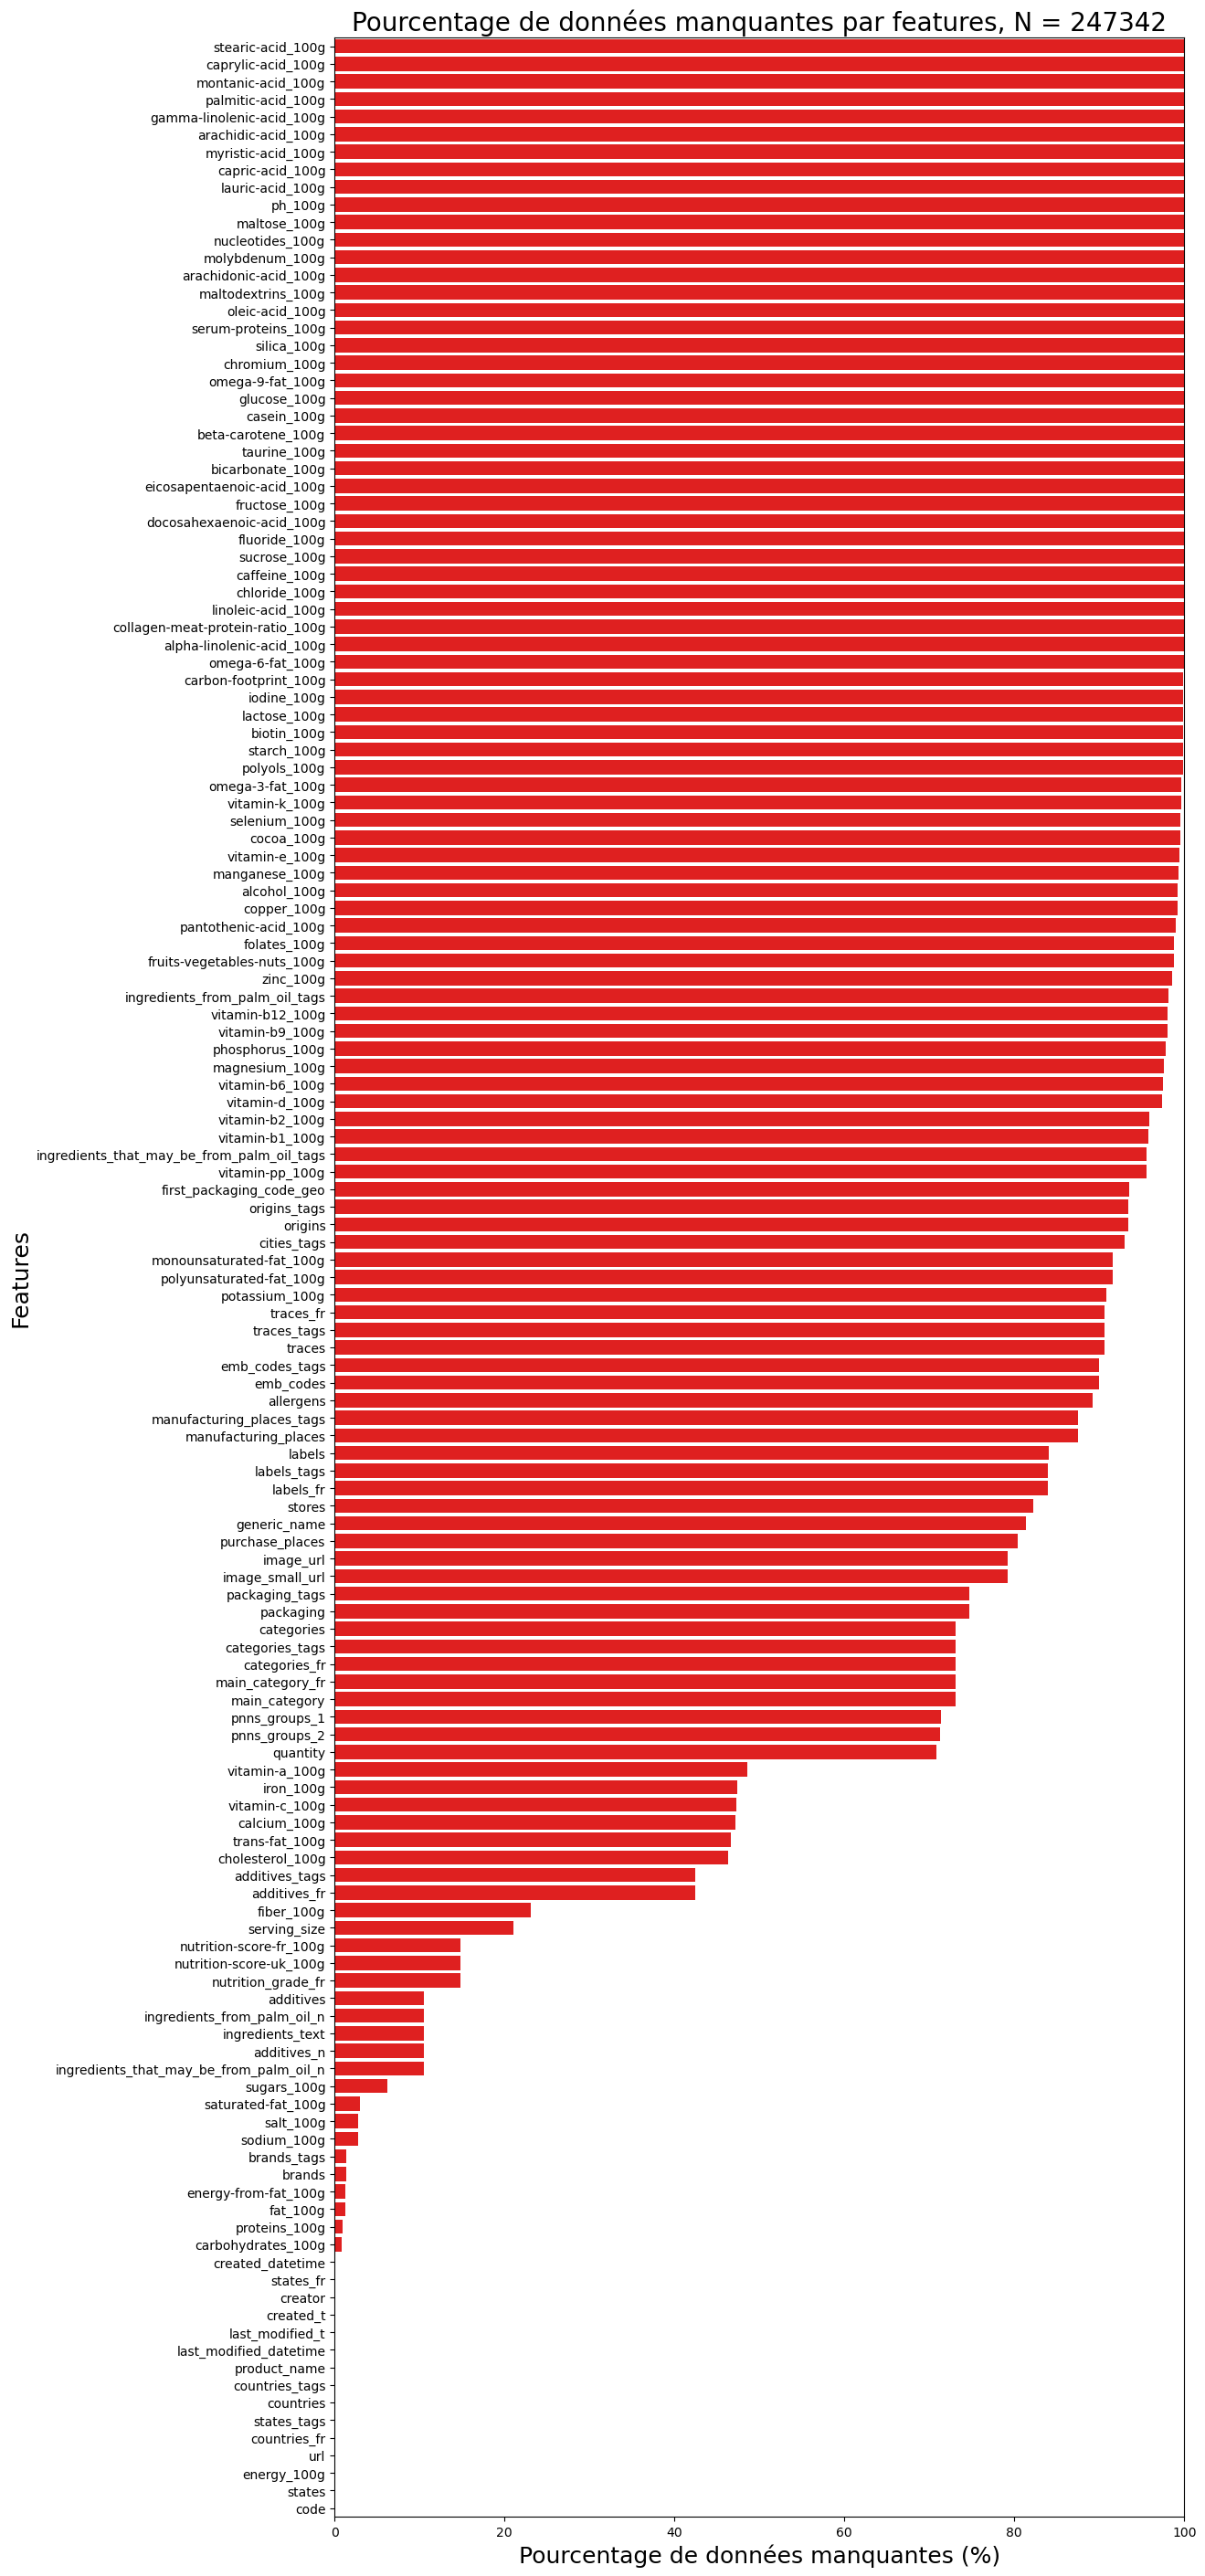

In [112]:
valeurs_manquantes_graph(data,'column')